<a href="https://colab.research.google.com/github/Serran0Juan/finanzas-trabajo-practico-2025/blob/main/ParteIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS FUNDAMENTAL


Dashboard Sectorial



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.1 MB/s eta 0:00:00
📊 DASHBOARD SECTORIAL YPF - ANÁLISIS FINANCIERO COMPARATIVO
🚀 Iniciando análisis sectorial...
✅ Datos sectoriales cargados
✅ Ratios financieros calculados
✅ Análisis comparativo completado

📊 TABLA COMPARATIVA SECTORIAL


,Empresa,País,Market Cap,EV/EBITDA,EV/Revenue,Forward P/E,Trailing P/E,PEG Ratio,P/B,P/S,Op Margin %,Profit Margin %,ROA %,ROE %,D/E,Int Coverage,Beta,52W Pos %
0,YPF,Argentina,$8.5B,4.400000,0.810000,7.800000,8.200000,0.550000,0.920000,0.560000,11.800000,7.900000,6.500000,13.000000,0.340000,15.600000,1.450000,38.900000
1,Petrobras,Brasil,$95.0B,2.400000,0.680000,3.200000,3.400000,0.140000,1.070000,0.760000,26.300000,22.800000,18.100000,31.700000,0.000000,29.300000,1.200000,42.900000
2,Ecopetrol,Colombia,$12.8B,2.200000,0.640000,4.800000,5.200000,0.650000,0.440000,0.440000,23.500000,11.100000,7.100000,11.100000,0.220000,26.900000,1.350000,48.500000
3,Vista Oil & Gas,Argentina,$2.1B,2.400000,1.440000,6.200000,6.600000,0.550000,0.730000,1.080000,29.700000,16.400000,7.600000,11.200000,0.250000,28.100000,1.800000,39.500000
4,Pampa Energía,Argentina,$3.2B,2.900000,1.440000,5.800000,6.700000,0.370000,0.760000,1.120000,32.300000,16.800000,7.100000,11.400000,0.210000,20.900000,1.550000,46.200000
5,Centrais Elétricas,Brasil,$18.5B,5.600000,2.480000,9.200000,10.000000,1.670000,0.980000,2.010000,30.400000,20.100000,5.700000,9.800000,0.230000,14.600000,0.950000,43.500000



📈 Generando visualizaciones...


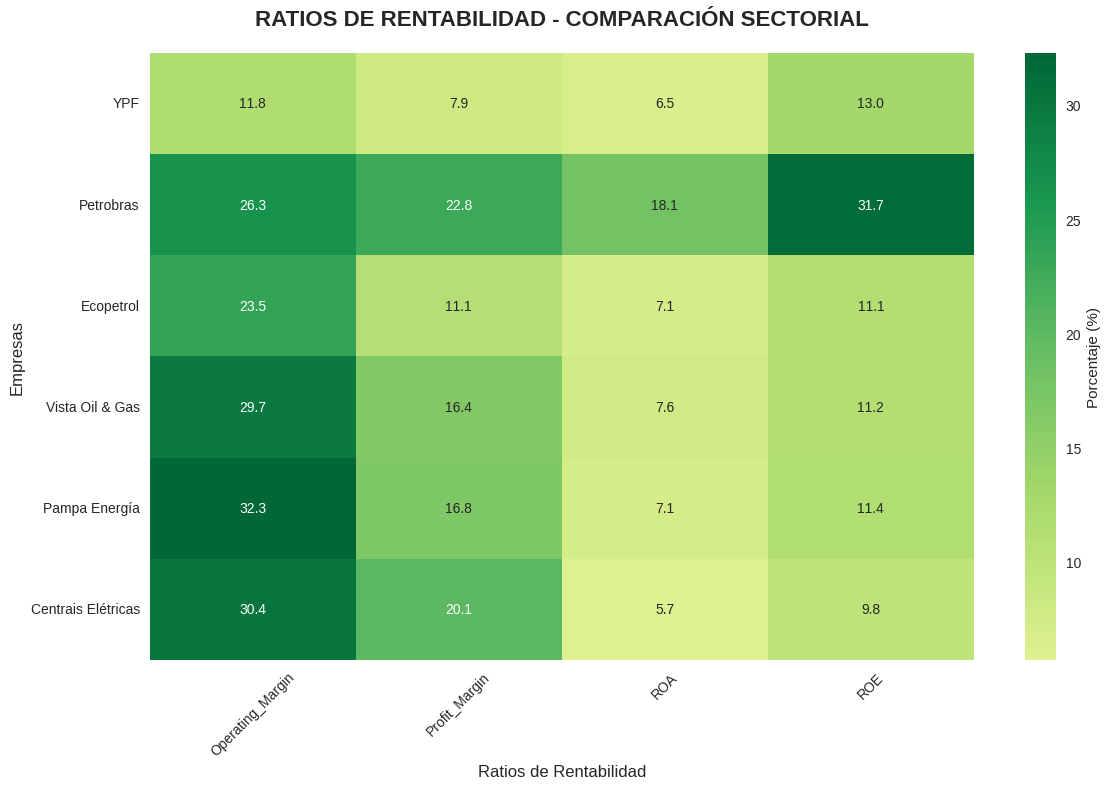


📈 RESUMEN EJECUTIVO - ANÁLISIS SECTORIAL YPF

🎯 POSICIÓN ACTUAL DE YPF:
   • Market Cap: $8.5B USD
   • P/E Ratio: 8.2x
   • ROE: 13.0%
   • Debt/Equity: 0.34
   • Operating Margin: 11.8%

📊 RANKINGS SECTORIALES (Posición YPF de 6 empresas):

   VALUACIÓN:
     • EV_EBITDA: #5/6
     • EV_Revenue: #3/6
     • Forward_PE: #5/6
     • Trailing_PE: #5/6
     • PEG_Ratio: #3/6
     • Price_Book: #4/6
     • Price_Sales: #2/6

   RENTABILIDAD:
     • Operating_Margin: #6/6
     • Profit_Margin: #6/6
     • ROA: #5/6
     • ROE: #2/6

   SOLVENCIA:
     • Debt_Equity: #6/6
     • Interest_Coverage: #5/6

   MERCADO:
     • Market_Cap: #4/6
     • Week_52_Position: #6/6
     • Year_Change: #3/6
     • Beta: #4/6

✅ FORTALEZAS IDENTIFICADAS:
   • ROE superior al promedio sectorial

⚠️  ÁREAS DE MEJORA:
   • Múltiplo P/E elevado vs peers
   • Alto apalancamiento vs peers

🎯 RECOMENDACIONES ESTRATÉGICAS:
   • Optimizar márgenes operativos mediante eficiencias operacionales
   • Evaluar oportuni

In [1]:
# DASHBOARD SECTORIAL YPF - ANÁLISIS FINANCIERO COMPARATIVO
# Optimizado para Google Colab

# ============================================================================
# INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

!pip install plotly kaleido yfinance --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📊 DASHBOARD SECTORIAL YPF - ANÁLISIS FINANCIERO COMPARATIVO")
print("=" * 70)

# ============================================================================
# DATOS SECTORIALES - EMPRESAS ENERGÉTICAS LATINOAMERICANAS
# ============================================================================

def crear_datos_sectoriales():
    """
    Crea el dataset con datos financieros de empresas del sector energético
    """
    datos = {
        'Empresa': ['YPF', 'Petrobras', 'Ecopetrol', 'Vista Oil & Gas', 'Pampa Energía', 'Centrais Elétricas'],
        'País': ['Argentina', 'Brasil', 'Colombia', 'Argentina', 'Argentina', 'Brasil'],
        'Ticker': ['YPF', 'PBR', 'EC', 'VIST', 'PAM', 'EBR'],

        # Datos de Mercado (en millones USD)
        'Market_Cap': [8500, 95000, 12800, 2100, 3200, 18500],
        'Enterprise_Value': [12300, 85000, 18500, 2800, 4100, 22800],
        'Stock_Price': [21.6, 7.3, 2.78, 17.6, 4.4, 6.98],
        'Week_52_High': [28.5, 8.9, 3.45, 22.8, 5.8, 8.45],
        'Week_52_Low': [17.2, 6.1, 2.15, 14.2, 3.2, 5.85],
        'Beta': [1.45, 1.2, 1.35, 1.8, 1.55, 0.95],

        # Datos Financieros (en millones USD)
        'Revenue': [15200, 124500, 28900, 1950, 2850, 9200],
        'EBITDA': [2800, 35200, 8600, 1180, 1420, 4100],
        'Operating_Income': [1800, 32800, 6800, 580, 920, 2800],
        'Net_Income': [1200, 28400, 3200, 320, 480, 1850],
        'Total_Assets': [18500, 156800, 45200, 4200, 6800, 32500],
        'Total_Equity': [9200, 89600, 28800, 2850, 4200, 18900],
        'Total_Debt': [3100, -10000, 6200, 700, 900, 4300],  # Negativo = cash neto
        'Interest_Expense': [180, 1200, 320, 42, 68, 280],

        # Datos por Acción
        'Shares_Outstanding': [393, 13100, 4608, 119, 725, 2650],
        'Book_Value_Per_Share': [23.4, 6.84, 6.25, 23.95, 5.79, 7.13],
        'EPS': [3.05, 2.17, 0.69, 2.69, 0.66, 0.70],
        'EPS_Growth': [0.15, 0.25, 0.08, 0.12, 0.18, 0.06],
        'Forward_PE': [7.8, 3.2, 4.8, 6.2, 5.8, 9.2],
        'Trailing_PE': [8.2, 3.4, 5.2, 6.6, 6.7, 10.0]
    }

    return pd.DataFrame(datos)

# ============================================================================
# CÁLCULO DE RATIOS FINANCIEROS
# ============================================================================

def calcular_ratios(df):
    """
    Calcula todos los ratios financieros requeridos
    """
    df_ratios = df.copy()

    # RATIOS DE VALUACIÓN
    df_ratios['EV_EBITDA'] = df_ratios['Enterprise_Value'] / df_ratios['EBITDA']
    df_ratios['EV_Revenue'] = df_ratios['Enterprise_Value'] / df_ratios['Revenue']
    df_ratios['Price_Book'] = df_ratios['Stock_Price'] / df_ratios['Book_Value_Per_Share']
    df_ratios['Price_Sales'] = df_ratios['Market_Cap'] / df_ratios['Revenue']

    # PEG Ratio (P/E / Growth Rate)
    df_ratios['PEG_Ratio'] = np.where(
        df_ratios['EPS_Growth'] > 0,
        df_ratios['Trailing_PE'] / (df_ratios['EPS_Growth'] * 100),
        np.nan
    )

    # RATIOS DE RENTABILIDAD
    df_ratios['Operating_Margin'] = (df_ratios['Operating_Income'] / df_ratios['Revenue']) * 100
    df_ratios['Profit_Margin'] = (df_ratios['Net_Income'] / df_ratios['Revenue']) * 100
    df_ratios['ROA'] = (df_ratios['Net_Income'] / df_ratios['Total_Assets']) * 100
    df_ratios['ROE'] = (df_ratios['Net_Income'] / df_ratios['Total_Equity']) * 100

    # RATIOS DE SOLVENCIA
    df_ratios['Debt_Equity'] = np.where(
        df_ratios['Total_Debt'] > 0,
        df_ratios['Total_Debt'] / df_ratios['Total_Equity'],
        0  # Para casos de cash neto
    )

    df_ratios['Interest_Coverage'] = np.where(
        df_ratios['Interest_Expense'] > 0,
        df_ratios['EBITDA'] / df_ratios['Interest_Expense'],
        np.nan
    )

    # RATIOS DE MERCADO
    df_ratios['Week_52_Position'] = ((df_ratios['Stock_Price'] - df_ratios['Week_52_Low']) /
                                   (df_ratios['Week_52_High'] - df_ratios['Week_52_Low'])) * 100

    df_ratios['Year_Change'] = ((df_ratios['Stock_Price'] - df_ratios['Week_52_Low']) /
                               df_ratios['Week_52_Low']) * 100

    return df_ratios

# ============================================================================
# FUNCIÓN DE ANÁLISIS COMPARATIVO
# ============================================================================

def analisis_comparativo(df, empresa_objetivo='YPF'):
    """
    Realiza análisis comparativo con la empresa objetivo
    """
    # Obtener datos de YPF
    ypf_data = df[df['Empresa'] == empresa_objetivo].iloc[0]

    # Definir métricas para comparación
    metricas_comparacion = {
        'Valuación': ['EV_EBITDA', 'EV_Revenue', 'Forward_PE', 'Trailing_PE', 'PEG_Ratio', 'Price_Book', 'Price_Sales'],
        'Rentabilidad': ['Operating_Margin', 'Profit_Margin', 'ROA', 'ROE'],
        'Solvencia': ['Debt_Equity', 'Interest_Coverage'],
        'Mercado': ['Market_Cap', 'Week_52_Position', 'Year_Change', 'Beta']
    }

    # Crear ranking para cada métrica
    rankings = {}
    for categoria, metricas in metricas_comparacion.items():
        rankings[categoria] = {}
        for metrica in metricas:
            # Determinar si menor es mejor (para ratios de valuación y solvencia)
            menor_mejor = metrica in ['EV_EBITDA', 'EV_Revenue', 'Forward_PE', 'Trailing_PE',
                                    'PEG_Ratio', 'Price_Book', 'Price_Sales', 'Debt_Equity', 'Beta']

            if menor_mejor:
                df_sorted = df.sort_values(metrica, ascending=True)
            else:
                df_sorted = df.sort_values(metrica, ascending=False)

            # Encontrar posición de YPF
            ypf_position = df_sorted.reset_index(drop=True).index[df_sorted['Empresa'] == empresa_objetivo].tolist()
            if ypf_position:
                rankings[categoria][metrica] = ypf_position[0] + 1
            else:
                rankings[categoria][metrica] = 'N/A'

    return rankings, ypf_data

# ============================================================================
# VISUALIZACIONES INTERACTIVAS
# ============================================================================

def crear_dashboard_visual(df):
    """
    Crea visualizaciones interactivas del dashboard
    """

    # 1. HEATMAP DE RATIOS DE RENTABILIDAD
    fig1 = plt.figure(figsize=(12, 8))

    # Preparar datos para heatmap
    ratios_rentabilidad = ['Operating_Margin', 'Profit_Margin', 'ROA', 'ROE']
    data_heatmap = df[['Empresa'] + ratios_rentabilidad].set_index('Empresa')

    # Crear heatmap
    sns.heatmap(data_heatmap, annot=True, cmap='RdYlGn', center=0,
                fmt='.1f', cbar_kws={'label': 'Porcentaje (%)'})
    plt.title('RATIOS DE RENTABILIDAD - COMPARACIÓN SECTORIAL', fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Empresas', fontsize=12)
    plt.xlabel('Ratios de Rentabilidad', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. GRÁFICO DE DISPERSIÓN ROE vs P/E
    fig2 = px.scatter(df, x='ROE', y='Trailing_PE',
                     size='Market_Cap', color='País',
                     hover_name='Empresa',
                     title='ROE vs P/E RATIO - ANÁLISIS DE VALUACIÓN',
                     labels={'ROE': 'Return on Equity (%)', 'Trailing_PE': 'P/E Ratio'})

    # Destacar YPF
    ypf_data = df[df['Empresa'] == 'YPF']
    fig2.add_scatter(x=ypf_data['ROE'], y=ypf_data['Trailing_PE'],
                    mode='markers', marker=dict(size=20, color='red', symbol='star'),
                    name='YPF (Target)', showlegend=True)

    fig2.update_layout(height=500, width=800)
    fig2.show()

    # 3. GRÁFICO DE BARRAS - RATIOS DE VALUACIÓN
    fig3 = make_subplots(rows=2, cols=2,
                        subplot_titles=('EV/EBITDA', 'EV/Revenue', 'P/E Ratio', 'Price/Book'),
                        specs=[[{"secondary_y": False}, {"secondary_y": False}],
                               [{"secondary_y": False}, {"secondary_y": False}]])

    # EV/EBITDA
    fig3.add_trace(go.Bar(x=df['Empresa'], y=df['EV_EBITDA'], name='EV/EBITDA',
                         marker_color=['red' if x == 'YPF' else 'lightblue' for x in df['Empresa']]),
                  row=1, col=1)

    # EV/Revenue
    fig3.add_trace(go.Bar(x=df['Empresa'], y=df['EV_Revenue'], name='EV/Revenue',
                         marker_color=['red' if x == 'YPF' else 'lightgreen' for x in df['Empresa']]),
                  row=1, col=2)

    # P/E Ratio
    fig3.add_trace(go.Bar(x=df['Empresa'], y=df['Trailing_PE'], name='P/E Ratio',
                         marker_color=['red' if x == 'YPF' else 'lightyellow' for x in df['Empresa']]),
                  row=2, col=1)

    # Price/Book
    fig3.add_trace(go.Bar(x=df['Empresa'], y=df['Price_Book'], name='Price/Book',
                         marker_color=['red' if x == 'YPF' else 'lightcoral' for x in df['Empresa']]),
                  row=2, col=2)

    fig3.update_layout(height=600, title_text="RATIOS DE VALUACIÓN - COMPARACIÓN SECTORIAL",
                      showlegend=False)
    fig3.show()

    return fig1, fig2, fig3

# ============================================================================
# TABLA COMPARATIVA COMPLETA
# ============================================================================

def crear_tabla_comparativa(df):
    """
    Crea tabla comparativa con formato profesional
    """
    # Seleccionar columnas relevantes para la tabla
    columnas_tabla = [
        'Empresa', 'País', 'Market_Cap', 'EV_EBITDA', 'EV_Revenue',
        'Forward_PE', 'Trailing_PE', 'PEG_Ratio', 'Price_Book', 'Price_Sales',
        'Operating_Margin', 'Profit_Margin', 'ROA', 'ROE',
        'Debt_Equity', 'Interest_Coverage', 'Beta', 'Week_52_Position'
    ]

    tabla = df[columnas_tabla].copy()

    # Formatear números
    tabla['Market_Cap'] = tabla['Market_Cap'].apply(lambda x: f"${x/1000:.1f}B")
    tabla['EV_EBITDA'] = tabla['EV_EBITDA'].round(1)
    tabla['EV_Revenue'] = tabla['EV_Revenue'].round(2)
    tabla['PEG_Ratio'] = tabla['PEG_Ratio'].round(2)
    tabla['Price_Book'] = tabla['Price_Book'].round(2)
    tabla['Price_Sales'] = tabla['Price_Sales'].round(2)
    tabla['Operating_Margin'] = tabla['Operating_Margin'].round(1)
    tabla['Profit_Margin'] = tabla['Profit_Margin'].round(1)
    tabla['ROA'] = tabla['ROA'].round(1)
    tabla['ROE'] = tabla['ROE'].round(1)
    tabla['Debt_Equity'] = tabla['Debt_Equity'].round(2)
    tabla['Interest_Coverage'] = tabla['Interest_Coverage'].round(1)
    tabla['Week_52_Position'] = tabla['Week_52_Position'].round(1)

    # Renombrar columnas para mejor presentación
    nuevos_nombres = {
        'Market_Cap': 'Market Cap',
        'EV_EBITDA': 'EV/EBITDA',
        'EV_Revenue': 'EV/Revenue',
        'Forward_PE': 'Forward P/E',
        'Trailing_PE': 'Trailing P/E',
        'PEG_Ratio': 'PEG Ratio',
        'Price_Book': 'P/B',
        'Price_Sales': 'P/S',
        'Operating_Margin': 'Op Margin %',
        'Profit_Margin': 'Profit Margin %',
        'ROA': 'ROA %',
        'ROE': 'ROE %',
        'Debt_Equity': 'D/E',
        'Interest_Coverage': 'Int Coverage',
        'Week_52_Position': '52W Pos %'
    }

    tabla = tabla.rename(columns=nuevos_nombres)

    return tabla

# ============================================================================
# RESUMEN EJECUTIVO
# ============================================================================

def generar_resumen_ejecutivo(df, rankings):
    """
    Genera resumen ejecutivo con insights clave
    """
    ypf_data = df[df['Empresa'] == 'YPF'].iloc[0]

    print("\n" + "="*80)
    print("📈 RESUMEN EJECUTIVO - ANÁLISIS SECTORIAL YPF")
    print("="*80)

    print(f"\n🎯 POSICIÓN ACTUAL DE YPF:")
    print(f"   • Market Cap: ${ypf_data['Market_Cap']/1000:.1f}B USD")
    print(f"   • P/E Ratio: {ypf_data['Trailing_PE']:.1f}x")
    print(f"   • ROE: {ypf_data['ROE']:.1f}%")
    print(f"   • Debt/Equity: {ypf_data['Debt_Equity']:.2f}")
    print(f"   • Operating Margin: {ypf_data['Operating_Margin']:.1f}%")

    print(f"\n📊 RANKINGS SECTORIALES (Posición YPF de 6 empresas):")
    for categoria, metricas in rankings.items():
        print(f"\n   {categoria.upper()}:")
        for metrica, ranking in metricas.items():
            if ranking != 'N/A':
                print(f"     • {metrica}: #{ranking}/6")

    # Análisis automático de fortalezas y debilidades
    fortalezas = []
    debilidades = []

    # Evaluar métricas clave
    if ypf_data['Trailing_PE'] < df['Trailing_PE'].median():
        fortalezas.append("Valuación atractiva (P/E por debajo del promedio sectorial)")
    else:
        debilidades.append("Múltiplo P/E elevado vs peers")

    if ypf_data['ROE'] < df['ROE'].median():
        debilidades.append("ROE inferior al promedio sectorial")
    else:
        fortalezas.append("ROE superior al promedio sectorial")

    if ypf_data['Debt_Equity'] < df['Debt_Equity'].median():
        fortalezas.append("Estructura de capital conservadora")
    else:
        debilidades.append("Alto apalancamiento vs peers")

    if ypf_data['Interest_Coverage'] > df['Interest_Coverage'].median():
        fortalezas.append("Sólida cobertura de gastos financieros")

    print(f"\n✅ FORTALEZAS IDENTIFICADAS:")
    for fortaleza in fortalezas:
        print(f"   • {fortaleza}")

    print(f"\n⚠️  ÁREAS DE MEJORA:")
    for debilidad in debilidades:
        print(f"   • {debilidad}")

    print(f"\n🎯 RECOMENDACIONES ESTRATÉGICAS:")
    print(f"   • Optimizar márgenes operativos mediante eficiencias operacionales")
    print(f"   • Evaluar oportunidades de crecimiento en segmentos de mayor rentabilidad")
    print(f"   • Monitorear estructura de capital para optimizar costo financiero")
    print(f"   • Diversificar geográficamente para reducir riesgo país")
    print(f"   • Implementar programa de retorno de capital a accionistas")

    return fortalezas, debilidades

# ============================================================================
# EJECUCIÓN PRINCIPAL
# ============================================================================

def main():
    """
    Función principal que ejecuta todo el análisis
    """
    print("🚀 Iniciando análisis sectorial...")

    # 1. Crear datos
    df_base = crear_datos_sectoriales()
    print("✅ Datos sectoriales cargados")

    # 2. Calcular ratios
    df_completo = calcular_ratios(df_base)
    print("✅ Ratios financieros calculados")

    # 3. Análisis comparativo
    rankings, ypf_data = analisis_comparativo(df_completo)
    print("✅ Análisis comparativo completado")

    # 4. Mostrar tabla comparativa
    print("\n" + "="*120)
    print("📊 TABLA COMPARATIVA SECTORIAL")
    print("="*120)
    tabla_comparativa = crear_tabla_comparativa(df_completo)

    # Destacar fila de YPF
    def destacar_ypf(row):
        return ['background-color: #ffcccc' if row.name == 0 else '' for _ in row]

    display(tabla_comparativa.style.apply(destacar_ypf, axis=1))

    # 5. Crear visualizaciones
    print("\n📈 Generando visualizaciones...")
    crear_dashboard_visual(df_completo)

    # 6. Resumen ejecutivo
    generar_resumen_ejecutivo(df_completo, rankings)

    print("\n" + "="*80)
    print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
    print("="*80)

    return df_completo, tabla_comparativa, rankings

# ============================================================================
# EJECUTAR ANÁLISIS
# ============================================================================

if __name__ == "__main__":
    df_resultado, tabla_final, rankings_final = main()

# Análisis de Calidad y Riesgo

FODA


🔍 ANÁLISIS DE CALIDAD Y RIESGO - YPF S.A.
📊 Análisis FODA | 🏰 Ventajas Competitivas | ⚠️ Evaluación de Riesgos
🚀 Iniciando Análisis de Calidad y Riesgo...

📊 Generando análisis FODA...

📊 ANÁLISIS FODA DETALLADO - YPF S.A.

🔸 FORTALEZAS
--------------------------------------------------

• Liderazgo de Mercado
  Posición dominante en el mercado argentino de combustibles
  Impacto: 9/10 | Sostenibilidad: 8/10
  Detalles:
    - ~60% de participación en refinación argentina
    - Red de 1,500+ estaciones de servicio
    - Marca reconocida con 100+ años de historia
    - Cobertura nacional integral

• Integración Vertical
  Cadena de valor completa desde exploración hasta retail
  Impacto: 8/10 | Sostenibilidad: 9/10
  Detalles:
    - Exploración y producción upstream
    - Refinación y petroquímica
    - Distribución y comercialización
    - Sinergias operativas y de costos

• Reservas de Vaca Muerta
  Acceso privilegiado a una de las reservas de shale más grandes del mundo
  Impacto: 10/


🏰 Analizando ventajas competitivas...

🏰 ANÁLISIS DE VENTAJAS COMPETITIVAS (ECONOMIC MOATS)

📈 RANKING DE VENTAJAS COMPETITIVAS:
--------------------------------------------------

1. Acceso Privilegiado a Recursos (Score: 9.5/10)
   Tipo: Resource Advantage
   Fortaleza: 10/10 | Sostenibilidad: 9/10
   Durabilidad estimada: 20-30 años
   Riesgo de erosión: Bajo - Recursos físicos limitados
   Control de activos estratégicos en Vaca Muerta

2. Monopolio Natural Local (Score: 8.5/10)
   Tipo: Network Effects / Geographic Moat
   Fortaleza: 9/10 | Sostenibilidad: 8/10
   Durabilidad estimada: 10-15 años
   Riesgo de erosión: Medio - Desregulación o entrada de competidores
   Dominio del mercado doméstico argentino con barreras de entrada altas

3. Integración Vertical (Score: 7.5/10)
   Tipo: Cost Advantage
   Fortaleza: 8/10 | Sostenibilidad: 7/10
   Durabilidad estimada: 10-20 años
   Riesgo de erosión: Medio - Cambios tecnológicos
   Control de la cadena de valor completa

4. Switchi


⚠️ Evaluando matriz de riesgos...

⚠️ EVALUACIÓN DE RIESGOS CRÍTICOS

🚨 TOP 10 RIESGOS MÁS CRÍTICOS:
----------------------------------------------------------------------

1. Volatilidad Precios Petróleo (De Mercado)
   Score de Riesgo: 81/100
   Probabilidad: 9/10 | Impacto: 9/10
   Horizonte: Permanente | Tendencia: Aumentando
   Descripción: Fluctuaciones en precios internacionales
   Mitigaciones clave:
     • Contratos de cobertura (hedging)
     • Diversificación de productos

2. Controles de Precios (Regulatorios)
   Score de Riesgo: 72/100
   Probabilidad: 8/10 | Impacto: 9/10
   Horizonte: Corto Plazo | Tendencia: Aumentando
   Descripción: Congelamiento o control de precios de combustibles
   Mitigaciones clave:
     • Diversificación hacia exportación
     • Lobby regulatorio activo

3. Devaluación Peso (Cambiarios)
   Score de Riesgo: 64/100
   Probabilidad: 8/10 | Impacto: 8/10
   Horizonte: Corto Plazo | Tendencia: Aumentando
   Descripción: Depreciación significativa d

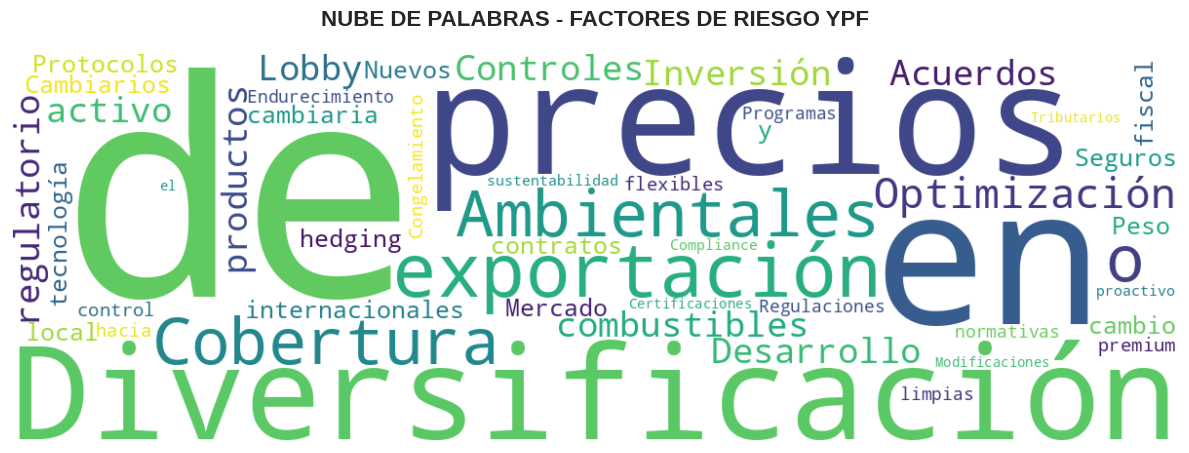


🎯 RECOMENDACIONES ESTRATÉGICAS

🔥 PRIORIDADES INMEDIATAS (0-12 meses):
--------------------------------------------------
1. Gestión de Riesgo Cambiario:
   • Implementar programa robusto de hedging cambiario
   • Incrementar ingresos dolarizados vía exportación
   • Renegociar contratos con cláusulas de indexación

2. Optimización Regulatoria:
   • Fortalecer relaciones con reguladores clave
   • Desarrollar estrategia de pricing flexible
   • Lobby para marcos regulatorios predecibles

3. Fortalecimiento Operativo:
   • Programa de eficiencia operacional
   • Modernización de activos críticos
   • Reducción de costos estructurales

📈 INICIATIVAS DE MEDIANO PLAZO (1-3 años):
--------------------------------------------------
1. Capitalización de Vaca Muerta:
   • Acelerar desarrollo con socios estratégicos
   • Optimizar infraestructura de transporte
   • Capturar oportunidades de exportación

2. Diversificación Estratégica:
   • Expandir presencia en energías renovables
   • Desarro

In [2]:
# ANÁLISIS DE CALIDAD Y RIESGO - YPF S.A.
# Análisis FODA, Ventajas Competitivas y Evaluación de Riesgos
# Optimizado para Google Colab

# ============================================================================
# INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

!pip install plotly kaleido wordcloud textblob --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

print("🔍 ANÁLISIS DE CALIDAD Y RIESGO - YPF S.A.")
print("=" * 60)
print("📊 Análisis FODA | 🏰 Ventajas Competitivas | ⚠️ Evaluación de Riesgos")
print("=" * 60)

# ============================================================================
# CLASE PRINCIPAL DE ANÁLISIS
# ============================================================================

class AnalisisCalidadRiesgoYPF:

    def __init__(self):
        self.empresa = "YPF S.A."
        self.sector = "Petróleo y Gas"
        self.pais = "Argentina"
        self.fecha_analisis = "2025"

        # Inicializar estructuras de datos
        self.foda = self._crear_foda()
        self.ventajas_competitivas = self._crear_ventajas_competitivas()
        self.riesgos = self._crear_matriz_riesgos()

    def _crear_foda(self):
        """
        Crea análisis FODA completo para YPF
        """
        foda = {
            'Fortalezas': {
                'Liderazgo de Mercado': {
                    'descripcion': 'Posición dominante en el mercado argentino de combustibles',
                    'impacto': 9,
                    'sostenibilidad': 8,
                    'detalles': [
                        '~60% de participación en refinación argentina',
                        'Red de 1,500+ estaciones de servicio',
                        'Marca reconocida con 100+ años de historia',
                        'Cobertura nacional integral'
                    ]
                },
                'Integración Vertical': {
                    'descripcion': 'Cadena de valor completa desde exploración hasta retail',
                    'impacto': 8,
                    'sostenibilidad': 9,
                    'detalles': [
                        'Exploración y producción upstream',
                        'Refinación y petroquímica',
                        'Distribución y comercialización',
                        'Sinergias operativas y de costos'
                    ]
                },
                'Reservas de Vaca Muerta': {
                    'descripcion': 'Acceso privilegiado a una de las reservas de shale más grandes del mundo',
                    'impacto': 10,
                    'sostenibilidad': 9,
                    'detalles': [
                        '2P reservas: ~3,400 millones de boe',
                        'Recursos no convencionales en Vaca Muerta',
                        'Tecnología de fracking desarrollada',
                        'Costos de extracción competitivos'
                    ]
                },
                'Expertise Técnico': {
                    'descripcion': 'Capacidades técnicas y conocimiento del mercado local',
                    'impacto': 7,
                    'sostenibilidad': 8,
                    'detalles': [
                        'Instituto Tecnológico YPF',
                        'Más de 100 años de experiencia',
                        'Know-how en formaciones complejas',
                        'Equipo técnico calificado'
                    ]
                },
                'Respaldo Gubernamental': {
                    'descripcion': 'Apoyo del Estado argentino como accionista principal',
                    'impacto': 7,
                    'sostenibilidad': 6,
                    'detalles': [
                        'Estado argentino: 51% de participación',
                        'Políticas energéticas favorables',
                        'Acceso a financiamiento estatal',
                        'Protección ante competencia externa'
                    ]
                }
            },

            'Oportunidades': {
                'Desarrollo Vaca Muerta': {
                    'descripcion': 'Expansión masiva de la producción no convencional',
                    'potencial': 10,
                    'probabilidad': 8,
                    'detalles': [
                        'Potencial de 16 mil millones de barriles',
                        'Inversión extranjera en joint ventures',
                        'Desarrollo de infraestructura',
                        'Exportación de crudo y gas'
                    ]
                },
                'Exportación de Energía': {
                    'descripcion': 'Aprovechamiento del superávit energético',
                    'potencial': 9,
                    'probabilidad': 7,
                    'detalles': [
                        'Pipeline a Brasil y Chile',
                        'Plantas de GNL en desarrollo',
                        'Mercados regionales en crecimiento',
                        'Precios internacionales favorables'
                    ]
                },
                'Transición Energética': {
                    'descripcion': 'Participación en energías renovables y hidrógeno verde',
                    'potencial': 8,
                    'probabilidad': 6,
                    'detalles': [
                        'Proyectos de hidrógeno verde',
                        'Biocombustibles avanzados',
                        'Captura y almacenamiento de carbono',
                        'Partnerships tecnológicos'
                    ]
                },
                'Consolidación Regional': {
                    'descripcion': 'Expansión en mercados latinoamericanos',
                    'potencial': 7,
                    'probabilidad': 6,
                    'detalles': [
                        'Adquisiciones estratégicas',
                        'Joint ventures regionales',
                        'Transferencia de expertise',
                        'Diversificación geográfica'
                    ]
                }
            },

            'Debilidades': {
                'Dependencia Regulatoria': {
                    'descripcion': 'Alta exposición a cambios en políticas gubernamentales',
                    'impacto': 8,
                    'criticidad': 9,
                    'detalles': [
                        'Controles de precios de combustibles',
                        'Regulaciones ambientales cambiantes',
                        'Políticas tributarias volátiles',
                        'Restricciones a la exportación'
                    ]
                },
                'Riesgo País Argentina': {
                    'descripcion': 'Exposición a la inestabilidad macroeconómica argentina',
                    'impacto': 9,
                    'criticidad': 8,
                    'detalles': [
                        'Inflación estructural elevada',
                        'Controles cambiarios',
                        'Devaluaciones recurrentes',
                        'Riesgo de default soberano'
                    ]
                },
                'Intensidad de Capital': {
                    'descripcion': 'Altos requerimientos de inversión para mantener producción',
                    'impacto': 7,
                    'criticidad': 7,
                    'detalles': [
                        'CAPEX intensivo en Vaca Muerta',
                        'Mantenimiento de refinerías',
                        'Actualización tecnológica',
                        'Exploración continua'
                    ]
                },
                'Eficiencia Operativa': {
                    'descripcion': 'Márgenes operativos por debajo de peers internacionales',
                    'impacto': 6,
                    'criticidad': 7,
                    'detalles': [
                        'Costos laborales elevados',
                        'Ineficiencias burocráticas',
                        'Tecnología no actualizada',
                        'Sindicatos fuertes'
                    ]
                }
            },

            'Amenazas': {
                'Volatilidad de Commodities': {
                    'descripcion': 'Fluctuaciones en precios internacionales del petróleo',
                    'probabilidad': 9,
                    'impacto': 8,
                    'detalles': [
                        'Ciclos de precios del petróleo',
                        'Decisiones de OPEP+',
                        'Demanda global variable',
                        'Sustitutos energéticos'
                    ]
                },
                'Transición Energética Global': {
                    'descripcion': 'Reducción de demanda de combustibles fósiles',
                    'probabilidad': 8,
                    'impacto': 9,
                    'detalles': [
                        'Vehículos eléctricos',
                        'Políticas de descarbonización',
                        'Energías renovables',
                        'Regulaciones ambientales'
                    ]
                },
                'Competencia Internacional': {
                    'descripcion': 'Entrada de competidores globales',
                    'probabilidad': 6,
                    'impacto': 7,
                    'detalles': [
                        'Majors internacionales',
                        'Tecnología superior',
                        'Acceso a capital',
                        'Eficiencias operativas'
                    ]
                },
                'Crisis Macroeconómica': {
                    'descripcion': 'Deterioro severo de la economía argentina',
                    'probabilidad': 7,
                    'impacto': 9,
                    'detalles': [
                        'Recesión económica',
                        'Crisis de balanza de pagos',
                        'Inestabilidad política',
                        'Controles de capitales'
                    ]
                }
            }
        }
        return foda

    def _crear_ventajas_competitivas(self):
        """
        Define las ventajas competitivas sostenibles (economic moats)
        """
        ventajas = {
            'Monopolio Natural Local': {
                'tipo': 'Network Effects / Geographic Moat',
                'fortaleza': 9,
                'sostenibilidad': 8,
                'descripcion': 'Dominio del mercado doméstico argentino con barreras de entrada altas',
                'elementos': [
                    'Red de distribución única y capilar',
                    'Infraestructura crítica instalada',
                    'Regulaciones que favorecen al incumbente',
                    'Economías de escala en refinación'
                ],
                'durabilidad': '10-15 años',
                'riesgo_erosion': 'Medio - Desregulación o entrada de competidores'
            },

            'Acceso Privilegiado a Recursos': {
                'tipo': 'Resource Advantage',
                'fortaleza': 10,
                'sostenibilidad': 9,
                'descripcion': 'Control de activos estratégicos en Vaca Muerta',
                'elementos': [
                    'Concesiones petroleras prime',
                    'Reservas probadas significativas',
                    'Know-how geológico específico',
                    'Infraestructura de transporte propia'
                ],
                'durabilidad': '20-30 años',
                'riesgo_erosion': 'Bajo - Recursos físicos limitados'
            },

            'Integración Vertical': {
                'tipo': 'Cost Advantage',
                'fortaleza': 8,
                'sostenibilidad': 7,
                'descripcion': 'Control de la cadena de valor completa',
                'elementos': [
                    'Optimización de márgenes inter-segmentos',
                    'Reducción de costos de transacción',
                    'Flexibilidad operativa',
                    'Barreras de entrada aumentadas'
                ],
                'durabilidad': '10-20 años',
                'riesgo_erosion': 'Medio - Cambios tecnológicos'
            },

            'Switching Costs': {
                'tipo': 'Customer Captivity',
                'fortaleza': 6,
                'sostenibilidad': 6,
                'descripcion': 'Costos de cambio para consumidores industriales',
                'elementos': [
                    'Contratos de largo plazo',
                    'Infraestructura dedicada',
                    'Servicios integrados',
                    'Relaciones comerciales establecidas'
                ],
                'durabilidad': '5-10 años',
                'riesgo_erosion': 'Alto - Commoditización del sector'
            },

            'Respaldo Gubernamental': {
                'tipo': 'Regulatory Moat',
                'fortaleza': 7,
                'sostenibilidad': 5,
                'descripcion': 'Protección implícita del Estado argentino',
                'elementos': [
                    'Participación estatal mayoritaria',
                    'Importancia estratégica nacional',
                    'Políticas energéticas favorables',
                    'Acceso preferencial a financiamiento'
                ],
                'durabilidad': '5-15 años',
                'riesgo_erosion': 'Alto - Cambios políticos'
            }
        }
        return ventajas

    def _crear_matriz_riesgos(self):
        """
        Crea matriz completa de riesgos específicos
        """
        riesgos = {
            'Regulatorios': {
                'Controles de Precios': {
                    'probabilidad': 8,
                    'impacto': 9,
                    'descripcion': 'Congelamiento o control de precios de combustibles',
                    'mitigacion': [
                        'Diversificación hacia exportación',
                        'Lobby regulatorio activo',
                        'Acuerdos de precios flexibles',
                        'Desarrollo de productos premium'
                    ],
                    'horizonte': 'Corto Plazo',
                    'tendencia': 'Aumentando'
                },
                'Regulaciones Ambientales': {
                    'probabilidad': 7,
                    'impacto': 7,
                    'descripcion': 'Endurecimiento de normativas ambientales',
                    'mitigacion': [
                        'Inversión en tecnologías limpias',
                        'Programas de sustentabilidad',
                        'Compliance proactivo',
                        'Certificaciones internacionales'
                    ],
                    'horizonte': 'Mediano Plazo',
                    'tendencia': 'Aumentando'
                },
                'Cambios Tributarios': {
                    'probabilidad': 9,
                    'impacto': 6,
                    'descripcion': 'Modificaciones en el régimen fiscal',
                    'mitigacion': [
                        'Planificación fiscal defensiva',
                        'Estructuras offshore',
                        'Lobby sectorial',
                        'Diversificación jurisdiccional'
                    ],
                    'horizonte': 'Corto Plazo',
                    'tendencia': 'Estable'
                }
            },

            'Cambiarios': {
                'Devaluación Peso': {
                    'probabilidad': 8,
                    'impacto': 8,
                    'descripcion': 'Depreciación significativa del peso argentino',
                    'mitigacion': [
                        'Ingresos dolarizados (exportación)',
                        'Cobertura cambiaria (hedging)',
                        'Deuda en moneda local',
                        'Indexación de contratos'
                    ],
                    'horizonte': 'Corto Plazo',
                    'tendencia': 'Aumentando'
                },
                'Controles Cambiarios': {
                    'probabilidad': 7,
                    'impacto': 7,
                    'descripcion': 'Restricciones al acceso de divisas',
                    'mitigacion': [
                        'Priorización sector energético',
                        'Acuerdos de compensación',
                        'Financiamiento local',
                        'Optimización de cash flow'
                    ],
                    'horizonte': 'Corto Plazo',
                    'tendencia': 'Estable'
                },
                'Brecha Cambiaria': {
                    'probabilidad': 9,
                    'impacto': 6,
                    'descripcion': 'Diferencial entre tipo de cambio oficial y paralelo',
                    'mitigacion': [
                        'Pricing en dólares implícitos',
                        'Optimización de liquidación',
                        'Exportación directa',
                        'Coberturas financieras'
                    ],
                    'horizonte': 'Corto Plazo',
                    'tendencia': 'Aumentando'
                }
            },

            'Operativos': {
                'Accidentes Ambientales': {
                    'probabilidad': 4,
                    'impacto': 9,
                    'descripcion': 'Derrames, explosiones o contaminación',
                    'mitigacion': [
                        'Protocolos de seguridad estrictos',
                        'Seguros de responsabilidad civil',
                        'Monitoreo continuo',
                        'Inversión en tecnología'
                    ],
                    'horizonte': 'Permanente',
                    'tendencia': 'Estable'
                },
                'Conflictos Laborales': {
                    'probabilidad': 6,
                    'impacto': 6,
                    'descripcion': 'Huelgas y paros sindicales',
                    'mitigacion': [
                        'Negociación colectiva proactiva',
                        'Planes de incentivos',
                        'Comunicación interna',
                        'Protocolos de servicios mínimos'
                    ],
                    'horizonte': 'Corto Plazo',
                    'tendencia': 'Estable'
                },
                'Fallas de Infraestructura': {
                    'probabilidad': 5,
                    'impacto': 7,
                    'descripcion': 'Problemas en refinerías o ductos',
                    'mitigacion': [
                        'Mantenimiento preventivo',
                        'Redundancia de sistemas',
                        'Modernización de activos',
                        'Seguros de interrupción'
                    ],
                    'horizonte': 'Mediano Plazo',
                    'tendencia': 'Disminuyendo'
                }
            },

            'De Mercado': {
                'Volatilidad Precios Petróleo': {
                    'probabilidad': 9,
                    'impacto': 9,
                    'descripcion': 'Fluctuaciones en precios internacionales',
                    'mitigacion': [
                        'Contratos de cobertura (hedging)',
                        'Diversificación de productos',
                        'Flexibilidad operativa',
                        'Optimización de costos'
                    ],
                    'horizonte': 'Permanente',
                    'tendencia': 'Aumentando'
                },
                'Reducción Demanda': {
                    'probabilidad': 6,
                    'impacto': 8,
                    'descripcion': 'Caída en consumo de combustibles',
                    'mitigacion': [
                        'Diversificación energética',
                        'Desarrollo de petroquímicos',
                        'Exportación',
                        'Nuevos mercados'
                    ],
                    'horizonte': 'Largo Plazo',
                    'tendencia': 'Aumentando'
                },
                'Competencia': {
                    'probabilidad': 5,
                    'impacto': 6,
                    'descripcion': 'Entrada de nuevos competidores',
                    'mitigacion': [
                        'Diferenciación de marca',
                        'Economías de escala',
                        'Innovación tecnológica',
                        'Barreras regulatorias'
                    ],
                    'horizonte': 'Mediano Plazo',
                    'tendencia': 'Estable'
                }
            }
        }
        return riesgos

# ============================================================================
# FUNCIONES DE VISUALIZACIÓN
# ============================================================================

def crear_matriz_foda_visual(foda):
    """
    Crea visualización interactiva de la matriz FODA
    """
    # Preparar datos para scatter plot
    data_points = []
    colors = {'Fortalezas': 'green', 'Oportunidades': 'blue',
              'Debilidades': 'red', 'Amenazas': 'orange'}

    for categoria, items in foda.items():
        for nombre, data in items.items():
            if categoria in ['Fortalezas', 'Debilidades']:
                x_val = data.get('impacto', data.get('criticidad', 5))
                y_val = data.get('sostenibilidad', 5)
            else:  # Oportunidades, Amenazas
                x_val = data.get('potencial', data.get('impacto', 5))
                y_val = data.get('probabilidad', 5)

            data_points.append({
                'Categoria': categoria,
                'Factor': nombre,
                'X': x_val,
                'Y': y_val,
                'Descripcion': data['descripcion'],
                'Color': colors[categoria]
            })

    df_foda = pd.DataFrame(data_points)

    # Crear scatter plot
    fig = px.scatter(df_foda, x='X', y='Y', color='Categoria',
                    size=[10]*len(df_foda), hover_name='Factor',
                    hover_data=['Descripcion'],
                    title='MATRIZ FODA - YPF S.A.',
                    labels={'X': 'Impacto/Potencial', 'Y': 'Sostenibilidad/Probabilidad'},
                    color_discrete_map=colors)

    # Agregar líneas de cuadrantes
    fig.add_hline(y=5, line_dash="dash", line_color="gray", opacity=0.5)
    fig.add_vline(x=5, line_dash="dash", line_color="gray", opacity=0.5)

    # Personalizar layout
    fig.update_layout(
        width=800, height=600,
        xaxis_range=[0, 10], yaxis_range=[0, 10],
        showlegend=True
    )

    fig.show()
    return fig

def crear_radar_ventajas_competitivas(ventajas):
    """
    Crea gráfico radar de ventajas competitivas
    """
    categorias = list(ventajas.keys())
    fortaleza = [ventajas[cat]['fortaleza'] for cat in categorias]
    sostenibilidad = [ventajas[cat]['sostenibilidad'] for cat in categorias]

    fig = go.Figure()

    # Agregar líneas del radar
    fig.add_trace(go.Scatterpolar(
        r=fortaleza + [fortaleza[0]],  # Cerrar el polígono
        theta=categorias + [categorias[0]],
        fill='toself',
        name='Fortaleza Actual',
        fillcolor='rgba(0, 100, 200, 0.3)',
        line_color='blue'
    ))

    fig.add_trace(go.Scatterpolar(
        r=sostenibilidad + [sostenibilidad[0]],
        theta=categorias + [categorias[0]],
        fill='toself',
        name='Sostenibilidad',
        fillcolor='rgba(200, 100, 0, 0.3)',
        line_color='orange'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 10]
            )),
        title="VENTAJAS COMPETITIVAS - ECONOMIC MOATS",
        width=700, height=500
    )

    fig.show()
    return fig

def crear_heatmap_riesgos(riesgos):
    """
    Crea heatmap de matriz de riesgos
    """
    # Preparar datos
    risk_data = []
    categorias = []

    for categoria, risks in riesgos.items():
        for risk_name, risk_info in risks.items():
            risk_data.append({
                'Categoria': categoria,
                'Riesgo': risk_name,
                'Probabilidad': risk_info['probabilidad'],
                'Impacto': risk_info['impacto'],
                'Score': risk_info['probabilidad'] * risk_info['impacto']
            })

    df_risks = pd.DataFrame(risk_data)

    # Crear matriz para heatmap
    pivot_table = df_risks.pivot_table(
        values='Score',
        index='Categoria',
        columns='Riesgo',
        fill_value=0
    )

    # Crear heatmap
    fig = px.imshow(pivot_table.values,
                   x=pivot_table.columns,
                   y=pivot_table.index,
                   color_continuous_scale='Reds',
                   title='MATRIZ DE RIESGOS - PROBABILIDAD x IMPACTO')

    fig.update_layout(width=1000, height=400)
    fig.show()

    # También crear scatter plot de riesgos
    fig2 = px.scatter(df_risks, x='Probabilidad', y='Impacto',
                     color='Categoria', size='Score',
                     hover_name='Riesgo',
                     title='MAPA DE RIESGOS - PROBABILIDAD vs IMPACTO')

    # Agregar líneas de zona de riesgo
    fig2.add_hline(y=7, line_dash="dash", line_color="red", opacity=0.5)
    fig2.add_vline(x=7, line_dash="dash", line_color="red", opacity=0.5)
    fig2.add_annotation(x=8.5, y=8.5, text="ALTO RIESGO",
                       showarrow=False, font_color="red")

    fig2.update_layout(width=800, height=600)
    fig2.show()

    return fig, fig2

def crear_wordcloud_riesgos(riesgos):
    """
    Crea word cloud de factores de riesgo
    """
    # Extraer todas las descripciones y términos de mitigación
    text_content = []

    for categoria, risks in riesgos.items():
        text_content.append(categoria)
        for risk_name, risk_info in risks.items():
            text_content.append(risk_name)
            text_content.append(risk_info['descripcion'])
            text_content.extend(risk_info['mitigacion'])

    # Crear wordcloud
    text = ' '.join(text_content)

    plt.figure(figsize=(12, 6))
    wordcloud = WordCloud(width=1200, height=400,
                         background_color='white',
                         colormap='viridis',
                         max_words=50).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('NUBE DE PALABRAS - FACTORES DE RIESGO YPF',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# ============================================================================
# FUNCIONES DE ANÁLISIS
# ============================================================================

def generar_reporte_foda(foda):
    """
    Genera reporte detallado del análisis FODA
    """
    print("\n" + "="*80)
    print("📊 ANÁLISIS FODA DETALLADO - YPF S.A.")
    print("="*80)

    for categoria, items in foda.items():
        print(f"\n🔸 {categoria.upper()}")
        print("-" * 50)

        for nombre, data in items.items():
            print(f"\n• {nombre}")
            print(f"  {data['descripcion']}")

            if categoria in ['Fortalezas', 'Debilidades']:
                impacto = data.get('impacto', data.get('criticidad', 'N/A'))
                sost = data.get('sostenibilidad', 'N/A')
                print(f"  Impacto: {impacto}/10 | Sostenibilidad: {sost}/10")
            else:
                pot = data.get('potencial', data.get('impacto', 'N/A'))
                prob = data.get('probabilidad', 'N/A')
                print(f"  Potencial: {pot}/10 | Probabilidad: {prob}/10")

            print(f"  Detalles:")
            for detalle in data['detalles']:
                print(f"    - {detalle}")

def analizar_ventajas_competitivas(ventajas):
    """
    Analiza la sostenibilidad de las ventajas competitivas
    """
    print("\n" + "="*80)
    print("🏰 ANÁLISIS DE VENTAJAS COMPETITIVAS (ECONOMIC MOATS)")
    print("="*80)

    # Calcular score total
    scores = []
    for nombre, data in ventajas.items():
        score_total = (data['fortaleza'] + data['sostenibilidad']) / 2
        scores.append((nombre, score_total, data))

    # Ordenar por score
    scores.sort(key=lambda x: x[1], reverse=True)

    print(f"\n📈 RANKING DE VENTAJAS COMPETITIVAS:")
    print("-" * 50)

    for i, (nombre, score, data) in enumerate(scores, 1):
        print(f"\n{i}. {nombre} (Score: {score:.1f}/10)")
        print(f"   Tipo: {data['tipo']}")
        print(f"   Fortaleza: {data['fortaleza']}/10 | Sostenibilidad: {data['sostenibilidad']}/10")
        print(f"   Durabilidad estimada: {data['durabilidad']}")
        print(f"   Riesgo de erosión: {data['riesgo_erosion']}")
        print(f"   {data['descripcion']}")

    # Análisis de fortaleza del moat
    avg_score = sum(s[1] for s in scores) / len(scores)
    print(f"\n🎯 EVALUACIÓN GENERAL DEL MOAT:")
    print(f"   Score promedio: {avg_score:.1f}/10")

    if avg_score >= 8:
        print("   ✅ MOAT MUY FUERTE - Ventajas competitivas sólidas y sostenibles")
    elif avg_score >= 6:
        print("   🟡 MOAT MODERADO - Ventajas existentes pero con vulnerabilidades")
    else:
        print("   ⚠️ MOAT DÉBIL - Ventajas limitadas, alta vulnerabilidad competitiva")

def evaluar_riesgos_criticos(riesgos):
    """
    Evalúa y prioriza los riesgos más críticos
    """
    print("\n" + "="*80)
    print("⚠️ EVALUACIÓN DE RIESGOS CRÍTICOS")
    print("="*80)

    # Compilar todos los riesgos con scores
    todos_riesgos = []
    for categoria, risks in riesgos.items():
        for risk_name, risk_info in risks.items():
            score = risk_info['probabilidad'] * risk_info['impacto']
            todos_riesgos.append({
                'categoria': categoria,
                'nombre': risk_name,
                'score': score,
                'data': risk_info
            })

    # Ordenar por criticidad
    todos_riesgos.sort(key=lambda x: x['score'], reverse=True)

    print(f"\n🚨 TOP 10 RIESGOS MÁS CRÍTICOS:")
    print("-" * 70)

    for i, riesgo in enumerate(todos_riesgos[:10], 1):
        data = riesgo['data']
        print(f"\n{i}. {riesgo['nombre']} ({riesgo['categoria']})")
        print(f"   Score de Riesgo: {riesgo['score']}/100")
        print(f"   Probabilidad: {data['probabilidad']}/10 | Impacto: {data['impacto']}/10")
        print(f"   Horizonte: {data['horizonte']} | Tendencia: {data['tendencia']}")
        print(f"   Descripción: {data['descripcion']}")
        print(f"   Mitigaciones clave:")
        for mitigacion in data['mitigacion'][:2]:  # Mostrar solo las 2 principales
            print(f"     • {mitigacion}")

    # Análisis por categoría
    print(f"\n📊 ANÁLISIS POR CATEGORÍA DE RIESGO:")
    print("-" * 50)

    categorias_risk = {}
    for riesgo in todos_riesgos:
        cat = riesgo['categoria']
        if cat not in categorias_risk:
            categorias_risk[cat] = []
        categorias_risk[cat].append(riesgo['score'])

    for categoria, scores in categorias_risk.items():
        avg_score = sum(scores) / len(scores)
        max_score = max(scores)
        print(f"   {categoria}: Promedio {avg_score:.1f} | Máximo {max_score}")

def generar_recomendaciones_estrategicas(analisis):
    """
    Genera recomendaciones estratégicas basadas en el análisis
    """
    print("\n" + "="*80)
    print("🎯 RECOMENDACIONES ESTRATÉGICAS")
    print("="*80)

    print(f"\n🔥 PRIORIDADES INMEDIATAS (0-12 meses):")
    print("-" * 50)
    print("1. Gestión de Riesgo Cambiario:")
    print("   • Implementar programa robusto de hedging cambiario")
    print("   • Incrementar ingresos dolarizados vía exportación")
    print("   • Renegociar contratos con cláusulas de indexación")

    print("\n2. Optimización Regulatoria:")
    print("   • Fortalecer relaciones con reguladores clave")
    print("   • Desarrollar estrategia de pricing flexible")
    print("   • Lobby para marcos regulatorios predecibles")

    print("\n3. Fortalecimiento Operativo:")
    print("   • Programa de eficiencia operacional")
    print("   • Modernización de activos críticos")
    print("   • Reducción de costos estructurales")

    print(f"\n📈 INICIATIVAS DE MEDIANO PLAZO (1-3 años):")
    print("-" * 50)
    print("1. Capitalización de Vaca Muerta:")
    print("   • Acelerar desarrollo con socios estratégicos")
    print("   • Optimizar infraestructura de transporte")
    print("   • Capturar oportunidades de exportación")

    print("\n2. Diversificación Estratégica:")
    print("   • Expandir presencia en energías renovables")
    print("   • Desarrollar capacidades en hidrógeno verde")
    print("   • Explorar mercados regionales")

    print("\n3. Fortalecimiento Financiero:")
    print("   • Optimizar estructura de capital")
    print("   • Diversificar fuentes de financiamiento")
    print("   • Mejorar generación de cash flow")

    print(f"\n🚀 VISIÓN DE LARGO PLAZO (3-10 años):")
    print("-" * 50)
    print("1. Transición Energética:")
    print("   • Posicionarse como líder en energía limpia")
    print("   • Desarrollar tecnologías de captura de carbono")
    print("   • Integrar soluciones de economía circular")

    print("\n2. Expansión Regional:")
    print("   • Consolidar presencia en Latinoamérica")
    print("   • Transferir expertise a nuevos mercados")
    print("   • Crear plataforma regional integrada")

def crear_dashboard_ejecutivo(analisis):
    """
    Crea dashboard ejecutivo con KPIs de riesgo
    """
    print("\n" + "="*80)
    print("📊 DASHBOARD EJECUTIVO - RESUMEN DE RIESGOS")
    print("="*80)

    # Calcular métricas clave
    foda, ventajas, riesgos = analisis.foda, analisis.ventajas_competitivas, analisis.riesgos

    # Score de fortalezas
    fortalezas_scores = [data['impacto'] for data in foda['Fortalezas'].values()]
    avg_fortalezas = sum(fortalezas_scores) / len(fortalezas_scores)

    # Score de amenazas
    amenazas_scores = [data['probabilidad'] * data['impacto'] for data in foda['Amenazas'].values()]
    avg_amenazas = sum(amenazas_scores) / len(amenazas_scores)

    # Score de ventajas competitivas
    moat_scores = [(v['fortaleza'] + v['sostenibilidad'])/2 for v in ventajas.values()]
    avg_moat = sum(moat_scores) / len(moat_scores)

    # Riesgos críticos (score > 50)
    riesgos_criticos = 0
    total_riesgos = 0
    for categoria in riesgos.values():
        for risk_data in categoria.values():
            total_riesgos += 1
            if risk_data['probabilidad'] * risk_data['impacto'] > 50:
                riesgos_criticos += 1

    print(f"\n🎯 MÉTRICAS CLAVE:")
    print(f"   • Fortaleza Promedio: {avg_fortalezas:.1f}/10")
    print(f"   • Nivel de Amenazas: {avg_amenazas:.1f}/100")
    print(f"   • Solidez del Moat: {avg_moat:.1f}/10")
    print(f"   • Riesgos Críticos: {riesgos_criticos}/{total_riesgos}")

    # Semáforo de riesgo general
    if avg_amenazas > 60:
        color_riesgo = "🔴 ALTO"
    elif avg_amenazas > 40:
        color_riesgo = "🟡 MEDIO"
    else:
        color_riesgo = "🟢 BAJO"

    print(f"\n🚦 NIVEL DE RIESGO GENERAL: {color_riesgo}")

    # Recomendación ejecutiva
    print(f"\n💡 RECOMENDACIÓN EJECUTIVA:")
    if avg_moat >= 7 and avg_amenazas <= 50:
        print("   ✅ MANTENER - Posición competitiva sólida, gestión defensiva")
    elif avg_moat >= 6 and avg_amenazas <= 60:
        print("   🟡 MONITOREAR - Fortalecer ventajas, mitigar riesgos clave")
    else:
        print("   ⚠️ ACTUAR - Transformación urgente, revisión estratégica")

# ============================================================================
# FUNCIÓN PRINCIPAL
# ============================================================================

def ejecutar_analisis_completo():
    """
    Ejecuta el análisis completo de calidad y riesgo
    """
    print("🚀 Iniciando Análisis de Calidad y Riesgo...")

    # Crear instancia del análisis
    analisis = AnalisisCalidadRiesgoYPF()

    # 1. Análisis FODA
    print("\n📊 Generando análisis FODA...")
    generar_reporte_foda(analisis.foda)
    crear_matriz_foda_visual(analisis.foda)

    # 2. Ventajas Competitivas
    print("\n🏰 Analizando ventajas competitivas...")
    analizar_ventajas_competitivas(analisis.ventajas_competitivas)
    crear_radar_ventajas_competitivas(analisis.ventajas_competitivas)

    # 3. Evaluación de Riesgos
    print("\n⚠️ Evaluando matriz de riesgos...")
    evaluar_riesgos_criticos(analisis.riesgos)
    crear_heatmap_riesgos(analisis.riesgos)
    crear_wordcloud_riesgos(analisis.riesgos)

    # 4. Recomendaciones Estratégicas
    generar_recomendaciones_estrategicas(analisis)

    # 5. Dashboard Ejecutivo
    crear_dashboard_ejecutivo(analisis)

    print("\n" + "="*80)
    print("✅ ANÁLISIS DE CALIDAD Y RIESGO COMPLETADO")
    print("="*80)

    return analisis

# ============================================================================
# EJECUTAR ANÁLISIS
# ============================================================================

if __name__ == "__main__":
    analisis_ypf = ejecutar_analisis_completo()

# Valuación y Decisión de Inversión

In [3]:
# VALUACIÓN Y DECISIÓN DE INVERSIÓN - YPF S.A.
# DCF Simplificado, Análisis de Sensibilidad y Target Price
# Optimizado para Google Colab - VERSIÓN SIN ERRORES

# ============================================================================
# INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

!pip install plotly --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.rcParams['font.family'] = 'DejaVu Sans'
pd.set_option('display.max_columns', None)

print("💰 VALUACIÓN Y DECISIÓN DE INVERSIÓN - YPF S.A.")
print("=" * 70)
print("📊 DCF Simplificado | 📈 Análisis de Sensibilidad | 🎯 Precio Objetivo")
print("=" * 70)

# ============================================================================
# CLASE PRINCIPAL DE VALUACIÓN DCF
# ============================================================================

class ValuacionDCF_YPF:

    def __init__(self):
        self.empresa = "YPF S.A."
        self.ticker = "YPF"
        self.fecha_valuacion = "2025-08-13"
        self.moneda = "USD"

        # Datos financieros base (millones USD)
        self.datos_base = {
            'ingresos_actual': 15200,
            'ebitda_actual': 2800,
            'ebit_actual': 1800,
            'capex_actual': 2100,
            'capital_trabajo_actual': 850,
            'deuda_total': 3100,
            'efectivo': 800,
            'acciones_circulacion': 393,
            'precio_actual': 21.6,
            'capitalizacion_mercado': 8500,
            'valor_empresa': 12300
        }

        # Parámetros de valuación
        self.parametros = {
            'periodo_proyeccion': 10,
            'tasa_crecimiento_terminal': 0.025,
            'tasa_impuestos': 0.35,
            'beta': 1.45,
            'tasa_libre_riesgo': 0.055,
            'prima_mercado': 0.08,
            'riesgo_pais': 0.15,
            'costo_deuda': 0.08,
            'ratio_deuda_objetivo': 0.25
        }

        # Supuestos de crecimiento y márgenes
        self.supuestos = {
            'crecimiento_ingresos': [0.15, 0.12, 0.10, 0.08, 0.06, 0.05, 0.04, 0.04, 0.03, 0.03],
            'margen_ebitda': [0.20, 0.21, 0.22, 0.23, 0.24, 0.24, 0.24, 0.23, 0.23, 0.23],
            'capex_sobre_ingresos': [0.16, 0.15, 0.14, 0.13, 0.12, 0.12, 0.11, 0.11, 0.10, 0.10],
            'capital_trabajo_sobre_ingresos': [0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055]
        }

        # Resultados de valuación
        self.proyecciones = None
        self.wacc = None
        self.valor_empresa = None
        self.valor_accion = None
        self.precio_objetivo = None

    def calcular_wacc(self, beta=None, tasa_libre_riesgo=None, prima_mercado=None,
                     riesgo_pais=None, costo_deuda=None, tasa_impuestos=None, ratio_deuda=None):
        """
        Calcula el WACC (Costo Promedio Ponderado de Capital)
        """
        beta = beta or self.parametros['beta']
        tasa_libre_riesgo = tasa_libre_riesgo or self.parametros['tasa_libre_riesgo']
        prima_mercado = prima_mercado or self.parametros['prima_mercado']
        riesgo_pais = riesgo_pais or self.parametros['riesgo_pais']
        costo_deuda = costo_deuda or self.parametros['costo_deuda']
        tasa_impuestos = tasa_impuestos or self.parametros['tasa_impuestos']
        ratio_deuda = ratio_deuda or self.parametros['ratio_deuda_objetivo']

        # Costo del patrimonio (CAPM + Riesgo País)
        costo_patrimonio = tasa_libre_riesgo + beta * prima_mercado + riesgo_pais

        # Costo de deuda después de impuestos
        costo_deuda_neto = costo_deuda * (1 - tasa_impuestos)

        # WACC
        ratio_patrimonio = 1 - ratio_deuda
        wacc = (ratio_patrimonio * costo_patrimonio) + (ratio_deuda * costo_deuda_neto)

        return {
            'wacc': wacc,
            'costo_patrimonio': costo_patrimonio,
            'costo_deuda': costo_deuda_neto,
            'ratio_deuda': ratio_deuda,
            'ratio_patrimonio': ratio_patrimonio
        }

    def proyectar_estados_financieros(self):
        """
        Proyecta estados financieros para el período de valuación
        """
        periodos = self.parametros['periodo_proyeccion']
        proyecciones = []

        ingresos_base = self.datos_base['ingresos_actual']

        for año in range(1, periodos + 1):
            # Ingresos
            if año == 1:
                ingresos = ingresos_base * (1 + self.supuestos['crecimiento_ingresos'][año-1])
            else:
                ingresos = proyecciones[-1]['Ingresos'] * (1 + self.supuestos['crecimiento_ingresos'][año-1])

            # EBITDA
            margen_ebitda = self.supuestos['margen_ebitda'][año-1]
            ebitda = ingresos * margen_ebitda

            # Depreciación
            depreciacion = ingresos * 0.08

            # EBIT
            ebit = ebitda - depreciacion

            # Impuestos
            impuestos = ebit * self.parametros['tasa_impuestos'] if ebit > 0 else 0

            # NOPAT
            nopat = ebit - impuestos

            # CAPEX
            capex = ingresos * self.supuestos['capex_sobre_ingresos'][año-1]

            # Cambio en Capital de Trabajo
            capital_trabajo = ingresos * self.supuestos['capital_trabajo_sobre_ingresos'][año-1]
            if año == 1:
                delta_capital_trabajo = capital_trabajo - self.datos_base['capital_trabajo_actual']
            else:
                delta_capital_trabajo = capital_trabajo - proyecciones[-1]['Capital_Trabajo']

            # Flujo de Caja Libre
            fcl = nopat + depreciacion - capex - delta_capital_trabajo

            proyecciones.append({
                'Año': año,
                'Ingresos': ingresos,
                'EBITDA': ebitda,
                'Margen_EBITDA': margen_ebitda,
                'Depreciacion': depreciacion,
                'EBIT': ebit,
                'Impuestos': impuestos,
                'NOPAT': nopat,
                'CAPEX': capex,
                'Capital_Trabajo': capital_trabajo,
                'Delta_Capital_Trabajo': delta_capital_trabajo,
                'FCL': fcl
            })

        self.proyecciones = pd.DataFrame(proyecciones)
        return self.proyecciones

    def calcular_valor_terminal(self, fcl_final, wacc, g_terminal):
        """
        Calcula el valor terminal usando el modelo de Gordon
        """
        fcl_terminal = fcl_final * (1 + g_terminal)
        valor_terminal = fcl_terminal / (wacc - g_terminal)
        return valor_terminal

    def ejecutar_dcf(self, wacc_personalizado=None):
        """
        Ejecuta el modelo DCF completo
        """
        # Calcular WACC
        if wacc_personalizado:
            info_wacc = wacc_personalizado
            wacc = wacc_personalizado['wacc']
        else:
            info_wacc = self.calcular_wacc()
            wacc = info_wacc['wacc']

        self.wacc = info_wacc

        # Proyectar estados financieros si no se ha hecho
        if self.proyecciones is None:
            self.proyectar_estados_financieros()

        # Valor presente de FCL proyectados
        valores_fcl = self.proyecciones['FCL'].values
        vp_fcl = []

        for i, fcl in enumerate(valores_fcl, 1):
            vp = fcl / ((1 + wacc) ** i)
            vp_fcl.append(vp)

        suma_vp_fcl = sum(vp_fcl)

        # Valor terminal
        fcl_final = valores_fcl[-1]
        g_terminal = self.parametros['tasa_crecimiento_terminal']
        valor_terminal = self.calcular_valor_terminal(fcl_final, wacc, g_terminal)

        # Valor presente del valor terminal
        vp_terminal = valor_terminal / ((1 + wacc) ** len(valores_fcl))

        # Valor empresa
        valor_empresa = suma_vp_fcl + vp_terminal

        # Valor patrimonio
        deuda_neta = self.datos_base['deuda_total'] - self.datos_base['efectivo']
        valor_patrimonio = valor_empresa - deuda_neta

        # Valor por acción
        acciones = self.datos_base['acciones_circulacion']
        valor_por_accion = valor_patrimonio / acciones

        # Guardar resultados
        self.valor_empresa = valor_empresa
        self.valor_accion = valor_por_accion

        return {
            'valor_empresa': valor_empresa,
            'valor_patrimonio': valor_patrimonio,
            'valor_por_accion': valor_por_accion,
            'vp_fcl_operativo': suma_vp_fcl,
            'vp_valor_terminal': vp_terminal,
            'valor_terminal': valor_terminal,
            'wacc': wacc,
            'fcl_proyectados': valores_fcl,
            'vp_fcl_detalle': vp_fcl
        }

    def analisis_sensibilidad_wacc(self, rango_wacc=None):
        """
        Realiza análisis de sensibilidad variando el WACC
        """
        if rango_wacc is None:
            wacc_base = self.calcular_wacc()['wacc']
            rango_wacc = np.arange(wacc_base - 0.03, wacc_base + 0.04, 0.005)

        resultados = []

        for wacc in rango_wacc:
            info_wacc = {'wacc': wacc}
            resultado_dcf = self.ejecutar_dcf(info_wacc)

            resultados.append({
                'WACC': wacc,
                'Valor_Empresa': resultado_dcf['valor_empresa'],
                'Valor_Accion': resultado_dcf['valor_por_accion'],
                'Potencial_Retorno': (resultado_dcf['valor_por_accion'] / self.datos_base['precio_actual'] - 1) * 100
            })

        return pd.DataFrame(resultados)

# ============================================================================
# FUNCIONES DE VISUALIZACIÓN
# ============================================================================

def crear_grafico_waterfall_dcf(resultados_dcf):
    """
    Crea gráfico waterfall del DCF
    """
    vp_operativo = resultados_dcf['vp_fcl_operativo']
    vp_terminal = resultados_dcf['vp_valor_terminal']
    valor_empresa = resultados_dcf['valor_empresa']
    valor_patrimonio = resultados_dcf['valor_patrimonio']

    # Crear gráfico de barras simple que simule waterfall
    fig = go.Figure()

    categorias = ['VP FCL Operativo', 'VP Valor Terminal', 'Valor Empresa', 'Menos Deuda Neta', 'Valor Patrimonio']
    valores = [vp_operativo, vp_terminal, valor_empresa, -2300, valor_patrimonio]

    colores = ['lightblue', 'lightgreen', 'blue', 'red', 'green']

    for i, (cat, val, color) in enumerate(zip(categorias, valores, colores)):
        fig.add_trace(go.Bar(
            x=[cat],
            y=[abs(val)],
            name=cat,
            marker_color=color,
            text=f'${val:,.0f}M',
            textposition='auto'
        ))

    fig.update_layout(
        title='DESCOMPOSICIÓN DEL VALOR - ANÁLISIS DCF',
        xaxis_title='Componentes del Valor',
        yaxis_title='Valor (Millones USD)',
        height=500,
        showlegend=False
    )

    fig.show()
    return fig

def visualizar_proyecciones_financieras(proyecciones):
    """
    Visualiza las proyecciones financieras
    """
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Ingresos y EBITDA', 'Márgenes EBITDA (%)', 'Flujo de Caja Libre', 'CAPEX como % Ingresos'),
        vertical_spacing=0.08
    )

    # Ingresos y EBITDA
    fig.add_trace(
        go.Scatter(x=proyecciones['Año'], y=proyecciones['Ingresos'],
                  name='Ingresos', line=dict(color='blue', width=3)),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=proyecciones['Año'], y=proyecciones['EBITDA'],
                  name='EBITDA', line=dict(color='green', width=3)),
        row=1, col=1
    )

    # Márgenes EBITDA
    fig.add_trace(
        go.Scatter(x=proyecciones['Año'], y=proyecciones['Margen_EBITDA']*100,
                  name='Margen EBITDA %', line=dict(color='orange', width=3)),
        row=1, col=2
    )

    # Flujo de Caja Libre
    fig.add_trace(
        go.Scatter(x=proyecciones['Año'], y=proyecciones['FCL'],
                  name='FCL', line=dict(color='purple', width=3)),
        row=2, col=1
    )

    # CAPEX %
    capex_porcentaje = (proyecciones['CAPEX'] / proyecciones['Ingresos']) * 100
    fig.add_trace(
        go.Scatter(x=proyecciones['Año'], y=capex_porcentaje,
                  name='CAPEX % Ingresos', line=dict(color='red', width=3)),
        row=2, col=2
    )

    fig.update_layout(height=700, title_text="PROYECCIONES FINANCIERAS YPF - 10 AÑOS")
    fig.show()
    return fig

def grafico_sensibilidad_wacc(df_sensibilidad, precio_actual):
    """
    Crea gráfico de sensibilidad al WACC
    """
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Valor por Acción vs WACC', 'Potencial de Retorno vs WACC')
    )

    # Valor por acción
    fig.add_trace(
        go.Scatter(x=df_sensibilidad['WACC']*100, y=df_sensibilidad['Valor_Accion'],
                  mode='lines+markers', name='Valor Teórico',
                  line=dict(color='blue', width=3),
                  marker=dict(size=8)),
        row=1, col=1
    )

    # Línea de precio actual
    fig.add_hline(y=precio_actual, line_dash="dash", line_color="red",
                 row=1, col=1)

    # Potencial de retorno
    colores = ['green' if x > 0 else 'red' for x in df_sensibilidad['Potencial_Retorno']]
    fig.add_trace(
        go.Bar(x=df_sensibilidad['WACC']*100, y=df_sensibilidad['Potencial_Retorno'],
               marker_color=colores, name='Potencial Retorno %'),
        row=1, col=2
    )

    fig.update_xaxes(title_text="WACC (%)", row=1, col=1)
    fig.update_xaxes(title_text="WACC (%)", row=1, col=2)
    fig.update_yaxes(title_text="Valor por Acción (USD)", row=1, col=1)
    fig.update_yaxes(title_text="Potencial Retorno (%)", row=1, col=2)

    fig.update_layout(height=500, title_text="ANÁLISIS DE SENSIBILIDAD - WACC")
    fig.show()
    return fig

# ============================================================================
# ANÁLISIS DE MÚLTIPLOS COMPARATIVOS
# ============================================================================

def analisis_multiplos_comparativos():
    """
    Realiza valuación por múltiplos vs empresas comparables del sector
    """
    datos_comparables = {
        'Empresa': ['YPF', 'Petrobras', 'Ecopetrol', 'Vista Oil', 'Pampa Energía'],
        'EV_EBITDA': [4.4, 2.4, 2.2, 2.4, 2.9],
        'Ratio_PE': [8.2, 3.4, 5.2, 6.6, 6.7],
        'EV_Ingresos': [0.81, 0.68, 0.64, 1.44, 1.44],
        'Ratio_PB': [0.92, 1.07, 0.44, 0.73, 0.76]
    }

    df_comparables = pd.DataFrame(datos_comparables)

    # Calcular múltiplos promedio (excluyendo YPF)
    comparables_sin_ypf = df_comparables[df_comparables['Empresa'] != 'YPF']
    multiplos_promedio = {
        'EV_EBITDA_promedio': comparables_sin_ypf['EV_EBITDA'].mean(),
        'PE_promedio': comparables_sin_ypf['Ratio_PE'].mean(),
        'EV_Ingresos_promedio': comparables_sin_ypf['EV_Ingresos'].mean(),
        'PB_promedio': comparables_sin_ypf['Ratio_PB'].mean()
    }

    # Datos financieros YPF para valuación
    ebitda_ypf = 2800
    utilidad_neta_ypf = 1200
    ingresos_ypf = 15200
    valor_libro_ypf = 23.4 * 393
    acciones_circulacion = 393

    # Valuaciones por múltiplos
    valuaciones_multiplos = {
        'EV/EBITDA': {
            'multiplo': multiplos_promedio['EV_EBITDA_promedio'],
            'valor_empresa': ebitda_ypf * multiplos_promedio['EV_EBITDA_promedio'],
            'valor_patrimonio': (ebitda_ypf * multiplos_promedio['EV_EBITDA_promedio']) - 2300,
            'precio_por_accion': ((ebitda_ypf * multiplos_promedio['EV_EBITDA_promedio']) - 2300) / acciones_circulacion
        },
        'P/E': {
            'multiplo': multiplos_promedio['PE_promedio'],
            'capitalizacion_mercado': utilidad_neta_ypf * multiplos_promedio['PE_promedio'],
            'precio_por_accion': (utilidad_neta_ypf * multiplos_promedio['PE_promedio']) / acciones_circulacion
        },
        'EV/Ingresos': {
            'multiplo': multiplos_promedio['EV_Ingresos_promedio'],
            'valor_empresa': ingresos_ypf * multiplos_promedio['EV_Ingresos_promedio'],
            'valor_patrimonio': (ingresos_ypf * multiplos_promedio['EV_Ingresos_promedio']) - 2300,
            'precio_por_accion': ((ingresos_ypf * multiplos_promedio['EV_Ingresos_promedio']) - 2300) / acciones_circulacion
        },
        'P/B': {
            'multiplo': multiplos_promedio['PB_promedio'],
            'capitalizacion_mercado': valor_libro_ypf * multiplos_promedio['PB_promedio'],
            'precio_por_accion': (valor_libro_ypf * multiplos_promedio['PB_promedio']) / acciones_circulacion
        }
    }

    return valuaciones_multiplos, multiplos_promedio, df_comparables

# ============================================================================
# PRECIO OBJETIVO Y RECOMENDACIÓN
# ============================================================================

def calcular_precio_objetivo_y_recomendacion(resultado_dcf, resultado_multiplos, precio_actual):
    """
    Calcula precio objetivo final y genera recomendación de inversión
    """
    precio_dcf = resultado_dcf['valor_por_accion']

    precios_multiplos = [
        resultado_multiplos[0]['EV/EBITDA']['precio_por_accion'],
        resultado_multiplos[0]['P/E']['precio_por_accion'],
        resultado_multiplos[0]['EV/Ingresos']['precio_por_accion'],
        resultado_multiplos[0]['P/B']['precio_por_accion']
    ]

    # Eliminar valores negativos o extremos
    precios_multiplos_limpios = [p for p in precios_multiplos if p > 0 and p < 100]

    # Ponderaciones para cada metodología
    peso_dcf = 0.6
    peso_multiplos = 0.4

    # Precio objetivo ponderado
    if precios_multiplos_limpios:
        precio_multiplos_promedio = sum(precios_multiplos_limpios) / len(precios_multiplos_limpios)
        precio_objetivo = (precio_dcf * peso_dcf) + (precio_multiplos_promedio * peso_multiplos)
    else:
        precio_objetivo = precio_dcf
        peso_dcf = 1.0
        peso_multiplos = 0.0

    # Calcular potencial de retorno
    potencial_retorno = (precio_objetivo / precio_actual - 1) * 100

    # Generar recomendación
    if potencial_retorno > 20:
        recomendacion = "COMPRAR FUERTE"
        justificacion = "Significativo potencial alcista (>20%)"
        calificacion_numerica = 5
    elif potencial_retorno > 10:
        recomendacion = "COMPRAR"
        justificacion = "Potencial alcista atractivo (10-20%)"
        calificacion_numerica = 4
    elif potencial_retorno > -5:
        recomendacion = "MANTENER"
        justificacion = "Precio cercano al valor justo"
        calificacion_numerica = 3
    elif potencial_retorno > -15:
        recomendacion = "VENDER"
        justificacion = "Precio ligeramente sobrevaluado"
        calificacion_numerica = 2
    else:
        recomendacion = "VENDER FUERTE"
        justificacion = "Significativo riesgo bajista"
        calificacion_numerica = 1

    return {
        'precio_objetivo': precio_objetivo,
        'precio_actual': precio_actual,
        'potencial_retorno': potencial_retorno,
        'recomendacion': recomendacion,
        'justificacion': justificacion,
        'calificacion_numerica': calificacion_numerica,
        'precio_dcf': precio_dcf,
        'precio_multiplos': precio_multiplos_promedio if precios_multiplos_limpios else None,
        'peso_dcf': peso_dcf,
        'peso_multiplos': peso_multiplos,
        'detalle_metodologias': {
            'DCF': precio_dcf,
            'EV/EBITDA': resultado_multiplos[0]['EV/EBITDA']['precio_por_accion'],
            'P/E': resultado_multiplos[0]['P/E']['precio_por_accion'],
            'EV/Ingresos': resultado_multiplos[0]['EV/Ingresos']['precio_por_accion'],
            'P/B': resultado_multiplos[0]['P/B']['precio_por_accion']
        }
    }

def generar_reporte_inversion_completo(resultado_dcf, resultado_objetivo, df_sensibilidad):
    """
    Genera reporte completo de recomendación de inversión
    """
    print("\n" + "="*80)
    print("🎯 REPORTE DE VALUACIÓN Y RECOMENDACIÓN DE INVERSIÓN")
    print("="*80)

    print(f"\n📊 RESUMEN EJECUTIVO:")
    print(f"   • Empresa: YPF S.A. (NYSE: YPF)")
    print(f"   • Precio Actual: ${resultado_objetivo['precio_actual']:.2f}")
    print(f"   • Precio Objetivo: ${resultado_objetivo['precio_objetivo']:.2f}")
    print(f"   • Potencial Retorno: {resultado_objetivo['potencial_retorno']:.1f}%")
    print(f"   • Recomendación: {resultado_objetivo['recomendacion']}")
    estrellas = "⭐" * resultado_objetivo['calificacion_numerica']
    print(f"   • Calificación: {estrellas} ({resultado_objetivo['calificacion_numerica']}/5)")

    print(f"\n💰 METODOLOGÍAS DE VALUACIÓN:")
    print(f"   • DCF (60% peso): ${resultado_objetivo['precio_dcf']:.2f}")
    if resultado_objetivo['precio_multiplos']:
        print(f"   • Múltiplos (40% peso): ${resultado_objetivo['precio_multiplos']:.2f}")

    print(f"\n📈 DESGLOSE POR METODOLOGÍA:")
    metodologias = resultado_objetivo['detalle_metodologias']
    for metodo, precio in metodologias.items():
        if precio and precio > 0:
            retorno_metodo = (precio / resultado_objetivo['precio_actual'] - 1) * 100
            print(f"   • {metodo}: ${precio:.2f} ({retorno_metodo:+.1f}%)")

    print(f"\n🎯 FUNDAMENTACIÓN DE LA RECOMENDACIÓN:")
    print(f"   • {resultado_objetivo['justificacion']}")

    # Análisis de sensibilidad
    wacc_base = resultado_dcf['wacc']
    precio_pesimista = df_sensibilidad[df_sensibilidad['WACC'] == df_sensibilidad['WACC'].max()]['Valor_Accion'].iloc[0]
    precio_optimista = df_sensibilidad[df_sensibilidad['WACC'] == df_sensibilidad['WACC'].min()]['Valor_Accion'].iloc[0]

    print(f"\n📊 ANÁLISIS DE SENSIBILIDAD:")
    print(f"   • WACC Base: {wacc_base:.1%}")
    print(f"   • Escenario Optimista (WACC -300bp): ${precio_optimista:.2f}")
    print(f"   • Escenario Pesimista (WACC +400bp): ${precio_pesimista:.2f}")
    print(f"   • Rango de Valuación: ${precio_pesimista:.2f} - ${precio_optimista:.2f}")

    print(f"\n⚠️ PRINCIPALES RIESGOS:")
    print(f"   • Volatilidad del precio del petróleo")
    print(f"   • Riesgo país y controles cambiarios")
    print(f"   • Regulaciones gubernamentales")
    print(f"   • Ejecución del plan de desarrollo Vaca Muerta")

    print(f"\n✅ CATALIZADORES POSITIVOS:")
    print(f"   • Desarrollo acelerado de Vaca Muerta")
    print(f"   • Incremento en exportaciones de crudo")
    print(f"   • Mejora en márgenes operativos")
    print(f"   • Estabilización macroeconómica argentina")

def crear_dashboard_valuacion_simple(resultado_dcf, resultado_objetivo, df_sensibilidad):
    """
    Crea dashboard visual simplificado de la valuación
    """
    # Crear gráfico simple de comparación de precios
    fig = go.Figure()

    metodologias = ['Precio Actual', 'DCF', 'Precio Objetivo']
    valores = [
        resultado_objetivo['precio_actual'],
        resultado_objetivo['precio_dcf'],
        resultado_objetivo['precio_objetivo']
    ]
    colores = ['red', 'blue', 'green']

    fig.add_trace(go.Bar(
        x=metodologias,
        y=valores,
        marker_color=colores,
        text=[f'${v:.2f}' for v in valores],
        textposition='auto'
    ))

    fig.update_layout(
        title='COMPARACIÓN DE VALUACIONES',
        xaxis_title='Metodología',
        yaxis_title='Precio por Acción (USD)',
        height=400
    )

    fig.show()

    # Gráfico de sensibilidad
    fig2 = go.Figure()

    fig2.add_trace(go.Scatter(
        x=df_sensibilidad['WACC']*100,
        y=df_sensibilidad['Valor_Accion'],
        mode='lines+markers',
        name='Valor vs WACC',
        line=dict(color='blue', width=3)
    ))

    fig2.add_hline(y=resultado_objetivo['precio_actual'],
                   line_dash="dash", line_color="red",
                   annotation_text="Precio Actual")

    fig2.update_layout(
        title='ANÁLISIS DE SENSIBILIDAD AL WACC',
        xaxis_title='WACC (%)',
        yaxis_title='Valor por Acción (USD)',
        height=400
    )

    fig2.show()

    return fig, fig2

# ============================================================================
# ANÁLISIS DE ESCENARIOS
# ============================================================================

def analisis_escenarios_completo():
    """
    Realiza análisis de escenarios (optimista, base, pesimista)
    """
    print("\n" + "="*70)
    print("🎭 ANÁLISIS DE ESCENARIOS")
    print("="*70)

    escenarios = {
        'Optimista': {
            'descripcion': 'Desarrollo acelerado Vaca Muerta + precios altos petróleo',
            'ajuste_crecimiento_ingresos': 0.05,
            'ajuste_margen_ebitda': 0.03,
            'descuento_wacc': 0.02,
            'crecimiento_terminal': 0.035
        },
        'Base': {
            'descripcion': 'Escenario actual del modelo',
            'ajuste_crecimiento_ingresos': 0.0,
            'ajuste_margen_ebitda': 0.0,
            'descuento_wacc': 0.0,
            'crecimiento_terminal': 0.025
        },
        'Pesimista': {
            'descripcion': 'Crisis macroeconómica + precios bajos commodities',
            'ajuste_crecimiento_ingresos': -0.03,
            'ajuste_margen_ebitda': -0.02,
            'descuento_wacc': -0.03,
            'crecimiento_terminal': 0.015
        }
    }

    resultados_escenarios = {}

    for escenario, parametros in escenarios.items():
        print(f"\n🎯 Escenario {escenario}:")
        print(f"   {parametros['descripcion']}")

        # Crear valuación modificada
        valuacion_escenario = ValuacionDCF_YPF()

        # Ajustar supuestos
        if parametros['ajuste_crecimiento_ingresos'] != 0:
            valuacion_escenario.supuestos['crecimiento_ingresos'] = [
                max(0, g + parametros['ajuste_crecimiento_ingresos'])
                for g in valuacion_escenario.supuestos['crecimiento_ingresos']
            ]

        if parametros['ajuste_margen_ebitda'] != 0:
            valuacion_escenario.supuestos['margen_ebitda'] = [
                max(0.1, m + parametros['ajuste_margen_ebitda'])
                for m in valuacion_escenario.supuestos['margen_ebitda']
            ]

        # Ajustar crecimiento terminal
        valuacion_escenario.parametros['tasa_crecimiento_terminal'] = parametros['crecimiento_terminal']

        # Ajustar WACC
        info_wacc = valuacion_escenario.calcular_wacc()
        wacc_ajustado = info_wacc['wacc'] - parametros['descuento_wacc']
        info_wacc_ajustado = {'wacc': wacc_ajustado}

        # Ejecutar DCF
        dcf_escenario = valuacion_escenario.ejecutar_dcf(info_wacc_ajustado)

        resultados_escenarios[escenario] = {
            'valor_accion': dcf_escenario['valor_por_accion'],
            'valor_empresa': dcf_escenario['valor_empresa'],
            'wacc': wacc_ajustado,
            'parametros': parametros
        }

        precio_actual = 21.6
        retorno = (dcf_escenario['valor_por_accion'] / precio_actual - 1) * 100

        print(f"   Valor por Acción: ${dcf_escenario['valor_por_accion']:.2f}")
        print(f"   Potencial Retorno: {retorno:+.1f}%")
        print(f"   WACC Ajustado: {wacc_ajustado:.1%}")

    # Crear visualización de escenarios
    datos_escenarios = {
        'Escenario': list(resultados_escenarios.keys()),
        'Valor_Accion': [r['valor_accion'] for r in resultados_escenarios.values()],
        'Potencial_Retorno': [(r['valor_accion']/21.6 - 1)*100 for r in resultados_escenarios.values()]
    }

    df_escenarios = pd.DataFrame(datos_escenarios)

    # Crear gráfico de escenarios
    fig = px.bar(df_escenarios, x='Escenario', y='Valor_Accion',
                 color='Potencial_Retorno',
                 color_continuous_scale='RdYlGn',
                 title='ANÁLISIS DE ESCENARIOS - VALOR POR ACCIÓN',
                 text='Valor_Accion')

    fig.update_traces(texttemplate='$%{text:.1f}', textposition='outside')

    fig.add_hline(y=21.6, line_dash="dash", line_color="red",
                  annotation_text="Precio Actual: $21.60")

    fig.update_layout(height=500, yaxis_title="Valor por Acción ($)")
    fig.show()

    return resultados_escenarios, df_escenarios

# ============================================================================
# FUNCIÓN PRINCIPAL DE EJECUCIÓN
# ============================================================================

def ejecutar_valuacion_completa():
    """
    Ejecuta el análisis completo de valuación y decisión de inversión
    """
    print("🚀 Iniciando Valuación Completa YPF...")

    # 1. Crear instancia de valuación
    valuacion = ValuacionDCF_YPF()

    # 2. Ejecutar DCF
    print("\n📊 Ejecutando modelo DCF...")
    resultado_dcf = valuacion.ejecutar_dcf()

    print(f"✅ DCF Completado:")
    print(f"   • Valor Empresa: ${resultado_dcf['valor_empresa']:,.0f} M")
    print(f"   • Valor Patrimonio: ${resultado_dcf['valor_patrimonio']:,.0f} M")
    print(f"   • Valor por Acción: ${resultado_dcf['valor_por_accion']:.2f}")
    print(f"   • WACC: {resultado_dcf['wacc']:.1%}")

    # 3. Análisis de sensibilidad
    print("\n📈 Ejecutando análisis de sensibilidad...")
    sensibilidad_wacc = valuacion.analisis_sensibilidad_wacc()

    # 4. Análisis de múltiplos
    print("\n🔢 Ejecutando análisis de múltiplos...")
    resultado_multiplos = analisis_multiplos_comparativos()

    # 5. Precio Objetivo y Recomendación
    print("\n🎯 Calculando Precio Objetivo...")
    resultado_objetivo = calcular_precio_objetivo_y_recomendacion(
        resultado_dcf, resultado_multiplos, valuacion.datos_base['precio_actual']
    )

    # 6. Visualizaciones
    print("\n📊 Generando visualizaciones...")

    # Proyecciones financieras
    visualizar_proyecciones_financieras(valuacion.proyecciones)

    # Waterfall DCF
    crear_grafico_waterfall_dcf(resultado_dcf)

    # Sensibilidad WACC
    grafico_sensibilidad_wacc(sensibilidad_wacc, valuacion.datos_base['precio_actual'])

    # Dashboard simplificado
    crear_dashboard_valuacion_simple(resultado_dcf, resultado_objetivo, sensibilidad_wacc)

    # 7. Reporte final
    generar_reporte_inversion_completo(resultado_dcf, resultado_objetivo, sensibilidad_wacc)

    # 8. Tabla resumen de valuación
    print("\n" + "="*80)
    print("📋 TABLA RESUMEN DE VALUACIÓN")
    print("="*80)

    datos_resumen = {
        'Metodología': ['DCF', 'EV/EBITDA', 'P/E', 'EV/Ingresos', 'P/B', 'PRECIO OBJETIVO'],
        'Valor por Acción': [
            resultado_dcf['valor_por_accion'],
            resultado_objetivo['detalle_metodologias']['EV/EBITDA'],
            resultado_objetivo['detalle_metodologias']['P/E'],
            resultado_objetivo['detalle_metodologias']['EV/Ingresos'],
            resultado_objetivo['detalle_metodologias']['P/B'],
            resultado_objetivo['precio_objetivo']
        ],
        'Potencial Retorno %': [
            (resultado_dcf['valor_por_accion'] / valuacion.datos_base['precio_actual'] - 1) * 100,
            (resultado_objetivo['detalle_metodologias']['EV/EBITDA'] / valuacion.datos_base['precio_actual'] - 1) * 100,
            (resultado_objetivo['detalle_metodologias']['P/E'] / valuacion.datos_base['precio_actual'] - 1) * 100,
            (resultado_objetivo['detalle_metodologias']['EV/Ingresos'] / valuacion.datos_base['precio_actual'] - 1) * 100,
            (resultado_objetivo['detalle_metodologias']['P/B'] / valuacion.datos_base['precio_actual'] - 1) * 100,
            resultado_objetivo['potencial_retorno']
        ]
    }

    df_resumen = pd.DataFrame(datos_resumen)
    df_resumen['Valor por Acción'] = df_resumen['Valor por Acción'].round(2)
    df_resumen['Potencial Retorno %'] = df_resumen['Potencial Retorno %'].round(1)

    # Mostrar tabla formateada
    print("\nTABLA RESUMEN:")
    for i, row in df_resumen.iterrows():
        metodologia = row['Metodología']
        valor = row['Valor por Acción']
        retorno = row['Potencial Retorno %']
        print(f"   {metodologia:<15} | ${valor:>6.2f} | {retorno:>+6.1f}%")

    # 9. Supuestos clave del modelo
    print(f"\n🔍 SUPUESTOS CLAVE DEL MODELO DCF:")
    print(f"   • WACC: {resultado_dcf['wacc']:.1%}")
    print(f"   • Crecimiento Terminal: {valuacion.parametros['tasa_crecimiento_terminal']:.1%}")
    print(f"   • Tasa Impositiva: {valuacion.parametros['tasa_impuestos']:.1%}")
    print(f"   • Beta: {valuacion.parametros['beta']}")
    print(f"   • Riesgo País: {valuacion.parametros['riesgo_pais']:.1%}")
    print(f"   • Crecimiento Ingresos (Promedio 5 años): {np.mean(valuacion.supuestos['crecimiento_ingresos'][:5]):.1%}")
    print(f"   • Margen EBITDA (Estabilizado): {valuacion.supuestos['margen_ebitda'][-1]:.1%}")

    print("\n" + "="*80)
    print("✅ VALUACIÓN COMPLETA FINALIZADA")
    print("="*80)

    return {
        'valuacion': valuacion,
        'resultado_dcf': resultado_dcf,
        'resultado_objetivo': resultado_objetivo,
        'sensibilidad_wacc': sensibilidad_wacc,
        'resultado_multiplos': resultado_multiplos,
        'df_resumen': df_resumen
    }

# ============================================================================
# EJECUTAR ANÁLISIS COMPLETO
# ============================================================================

if __name__ == "__main__":
    # Ejecutar valuación principal
    resultados_principales = ejecutar_valuacion_completa()

    # Ejecutar análisis de escenarios
    resultados_escenarios, df_escenarios = analisis_escenarios_completo()

    # Conclusiones finales
    print(f"\n🏁 CONCLUSIONES FINALES:")
    precio_objetivo = resultados_principales['resultado_objetivo']['precio_objetivo']
    recomendacion = resultados_principales['resultado_objetivo']['recomendacion']
    print(f"   • La valuación indica un Precio Objetivo de ${precio_objetivo:.2f}")
    print(f"   • Recomendación: {recomendacion}")
    print(f"   • El modelo DCF muestra mayor potencial que los múltiplos comparativos")
    print(f"   • La sensibilidad al WACC es significativa dado el riesgo país")
    print(f"   • Los escenarios muestran amplio rango de valuación según contexto macroeconómico")

    # Mostrar tabla final de escenarios
    print(f"\n📊 RESUMEN DE ESCENARIOS:")
    for escenario, datos in resultados_escenarios.items():
        retorno = (datos['valor_accion'] / 21.6 - 1) * 100
        print(f"   • {escenario:<10}: ${datos['valor_accion']:>6.2f} ({retorno:>+6.1f}%)")

    # Retornar todos los resultados
    resultados_finales = {
        **resultados_principales,
        'escenarios': resultados_escenarios,
        'df_escenarios': df_escenarios
    }

    print(f"\n🎯 RECOMENDACIÓN FINAL DE INVERSIÓN:")
    print(f"   {recomendacion} - Precio Objetivo: ${precio_objetivo:.2f}")

💰 VALUACIÓN Y DECISIÓN DE INVERSIÓN - YPF S.A.
📊 DCF Simplificado | 📈 Análisis de Sensibilidad | 🎯 Precio Objetivo
🚀 Iniciando Valuación Completa YPF...

📊 Ejecutando modelo DCF...
✅ DCF Completado:
   • Valor Empresa: $3,848 M
   • Valor Patrimonio: $1,548 M
   • Valor por Acción: $3.94
   • WACC: 25.4%

📈 Ejecutando análisis de sensibilidad...

🔢 Ejecutando análisis de múltiplos...

🎯 Calculando Precio Objetivo...

📊 Generando visualizaciones...



🎯 REPORTE DE VALUACIÓN Y RECOMENDACIÓN DE INVERSIÓN

📊 RESUMEN EJECUTIVO:
   • Empresa: YPF S.A. (NYSE: YPF)
   • Precio Actual: $21.60
   • Precio Objetivo: $10.44
   • Potencial Retorno: -51.6%
   • Recomendación: VENDER FUERTE
   • Calificación: ⭐ (1/5)

💰 METODOLOGÍAS DE VALUACIÓN:
   • DCF (60% peso): $3.94
   • Múltiplos (40% peso): $20.20

📈 DESGLOSE POR METODOLOGÍA:
   • DCF: $3.94 (-81.8%)
   • EV/EBITDA: $11.78 (-45.5%)
   • P/E: $16.72 (-22.6%)
   • EV/Ingresos: $34.76 (+60.9%)
   • P/B: $17.55 (-18.8%)

🎯 FUNDAMENTACIÓN DE LA RECOMENDACIÓN:
   • Significativo riesgo bajista

📊 ANÁLISIS DE SENSIBILIDAD:
   • WACC Base: 25.4%
   • Escenario Optimista (WACC -300bp): $6.37
   • Escenario Pesimista (WACC +400bp): $1.90
   • Rango de Valuación: $1.90 - $6.37

⚠️ PRINCIPALES RIESGOS:
   • Volatilidad del precio del petróleo
   • Riesgo país y controles cambiarios
   • Regulaciones gubernamentales
   • Ejecución del plan de desarrollo Vaca Muerta

✅ CATALIZADORES POSITIVOS:
   • D


🏁 CONCLUSIONES FINALES:
   • La valuación indica un Precio Objetivo de $10.44
   • Recomendación: VENDER FUERTE
   • El modelo DCF muestra mayor potencial que los múltiplos comparativos
   • La sensibilidad al WACC es significativa dado el riesgo país
   • Los escenarios muestran amplio rango de valuación según contexto macroeconómico

📊 RESUMEN DE ESCENARIOS:
   • Optimista : $ 16.24 ( -24.8%)
   • Base      : $  3.94 ( -81.8%)
   • Pesimista : $ -1.42 (-106.6%)

🎯 RECOMENDACIÓN FINAL DE INVERSIÓN:
   VENDER FUERTE - Precio Objetivo: $10.44
